In [1]:
options(repr.plot.width=14, repr.plot.height=10)

install.packages('RCurl')
require(repr) # Enables resizing of the plots.
require(RCurl)
require(foreign)
require(tidyverse) # To tip the df from long row of dates to cols (pivot_longer())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: repr

Loading required package: RCurl

Loading required package: foreign

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



In [2]:
# Extracting the number of confirmed cummulative cases by country from the Johns Hopkins website:

x = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
corona <- read.csv(textConnection(x))

corona = (read_csv(x)
          %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                           names_to = "date",
                           values_to = "cases")
          %>% select(`Province/State`,`Country/Region`, date, cases)
          %>% mutate(date=as.Date(date,format="%m/%d/%y"))
          %>% drop_na(cases)
          %>% rename(country="Country/Region", provinces="Province/State")
)

cc <- (corona
       %>% filter(country %in% c("Italy", "Spain","US", "Norway", "Denmark", "Sweden","Korea, South", "Brazil"))
)

ccw <- (cc
        %>% pivot_wider(names_from="country",values_from="cases")
        %>% filter(Italy>5)
)

In [3]:
# Extracting the number of confirmed cummulative cases in China from the Johns Hopkins website:

china <- corona[corona$country=='China',]
provinces <- c('Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
               'Jiangxi','Shandong','Jiangsu','Sichuan','Heilongjiang','Hebei',
               'Fujian','Guangxi','Shaanxi','Yunnan','Hainan','Guizhou','Shanxi',
               'Gansu','Hong Kong','Liaoning','Jilin','Xinjiang','Inner Mongolia',
               'Ningxia','Qinghai','Macau','Tibet')

china_prov <- china[is.element(china$provinces,provinces),]
ccchina <- china_prov[,2:4]
temp <- aggregate(ccchina[ ,3], FUN="sum", by=list(as.Date(ccchina$date)))
ccchina[1:nrow(temp),2:3] <- temp 
ccchina <- ccchina[1:nrow(temp),]

ccw_china <- (ccchina
              %>% pivot_wider(names_from=country,values_from="cases")
              %>% filter(China>1)
)

In [4]:
# Extracting number of cummulative deaths by country from the Johns Hopkins website:

y = getURL("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
corona_death <- read.csv(textConnection(y))

corona_death = (read_csv(y)
                %>% pivot_longer(cols = -c(`Province/State`, `Country/Region`, Lat, Long),
                                 names_to = "date",
                                 values_to = "cases")
                %>% select(`Province/State`, `Country/Region`, date, cases)
                %>% mutate(date=as.Date(date,format="%m/%d/%y"))
                %>% drop_na(cases)
                %>% rename(country="Country/Region")
                %>% rename(state="Province/State")
)

ccd <- (corona_death
        %>% filter(country %in% c("Italy", "Spain","US", "Norway", "Denmark", "Sweden", "Brazil"))
)

ccwd <- (ccd
         %>% pivot_wider(names_from="country",values_from="cases")
         %>% filter(Italy>1)
)


In [5]:
# Extracting the number of cummulative deaths in China from the Johns Hopkins website:

china <- corona_death[corona_death$country=='China',]
provinces <- c('Hubei', 'Guangdong', 'Henan', 'Zhejiang', 'Hunan', 'Anhui',
               'Jiangxi','Shandong','Jiangsu','Sichuan','Heilongjiang','Hebei',
               'Fujian','Guangxi','Shaanxi','Yunnan','Hainan','Guizhou','Shanxi',
               'Gansu','Hong Kong','Liaoning','Jilin','Xinjiang','Inner Mongolia',
               'Ningxia','Qinghai','Macau','Tibet')
china_prov <- china[is.element(china$state,provinces),]
ccchina <- china_prov[,2:4]
temp <- aggregate(ccchina[ ,3], FUN="sum", by=list(as.Date(ccchina$date)))

ccchina[1:nrow(temp),2:3] <- temp 
ccchina <- ccchina[1:nrow(temp),]


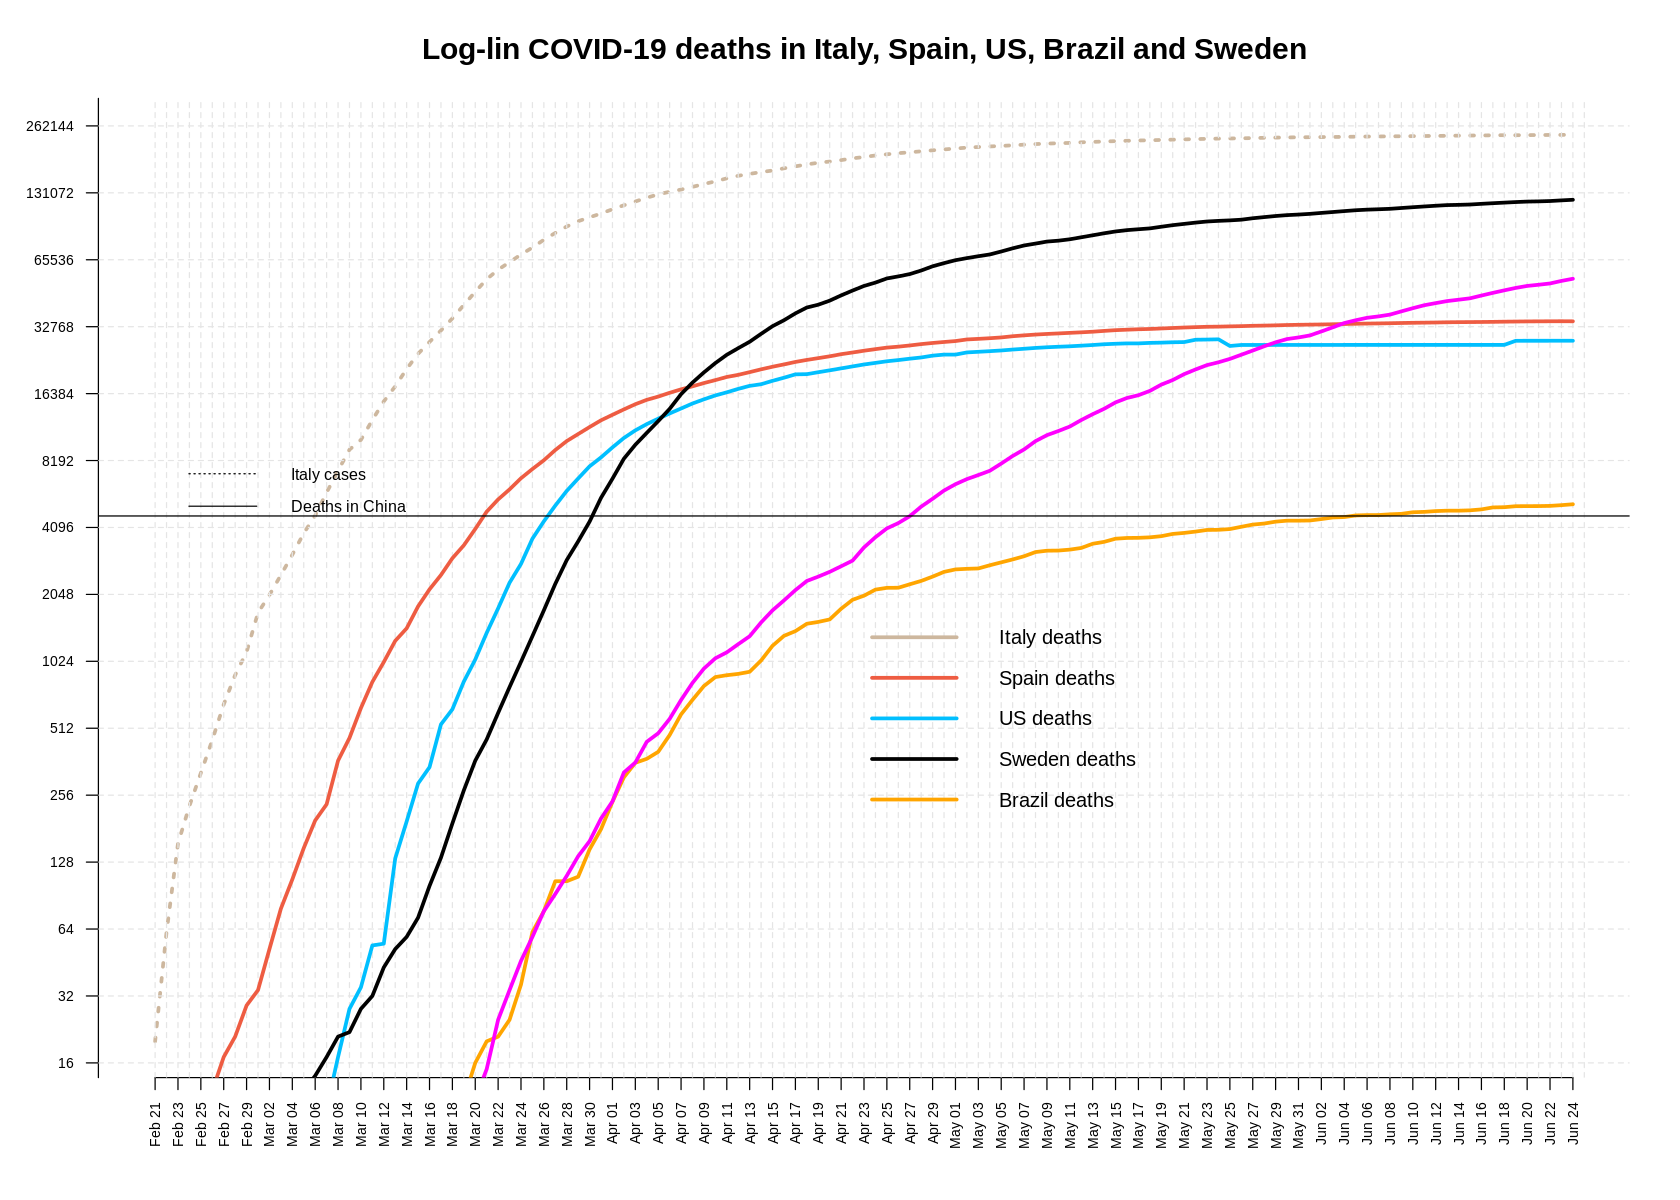

In [25]:
# Log-linear plot of cummulative deaths by country with the number of cases in Italy for comparison:

plot(ccw$date, ccw$Italy, type="l", lwd=3, lty=3,
     ylab='', 
     xlab='',
     log='y',
     main ='Log-lin COVID-19 deaths in Italy, Spain, US, Brazil and Sweden',
     col="bisque3",
     axes=FALSE,
     cex.main=1.5)

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


at2 <- 2^seq(1,30,by=1)
axis(side=2, at2, cex.axis=0.7, las=1)

abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
at1 <- seq(min(ccw$date), max(ccw$date)+1, by=1);
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines


lines(ccwd$date, ccwd$Italy, type="l", lwd=3, lty=1, col="tomato2")
lines(ccwd$date, ccwd$Spain, lwd=3, col="deepskyblue1")
lines(ccwd$date, ccwd$US, lwd=3)
lines(ccwd$date, ccwd$Sweden, type="l", lwd=3, lty=1, col="orange")
lines(ccwd$date, ccwd$Brazil, type="l", lwd=3, lty=1, col="magenta")

legend(ccw$date[60], 2000, bg="transparent",
       legend=c("Italy deaths", 
                "Spain deaths", "US deaths", "Sweden deaths", "Brazil deaths"),
       col=c("bisque3", "tomato2", "deepskyblue1", 1,"orange", "magenta"), lty=c(1,1,1,1,1), lwd=3, cex=1,
       box.lty=0)


#lines(ccchina$date, ccchina$cases, lwd=3, col=2)
abline(h=max(ccchina$cases))
legend(ccw$date[1], 10000, legend=c("Italy cases", "Deaths in China"), bg="transparent",
       col=c(1), lty=c(3,1), lwd=1, cex=0.8,
       box.lty=0)

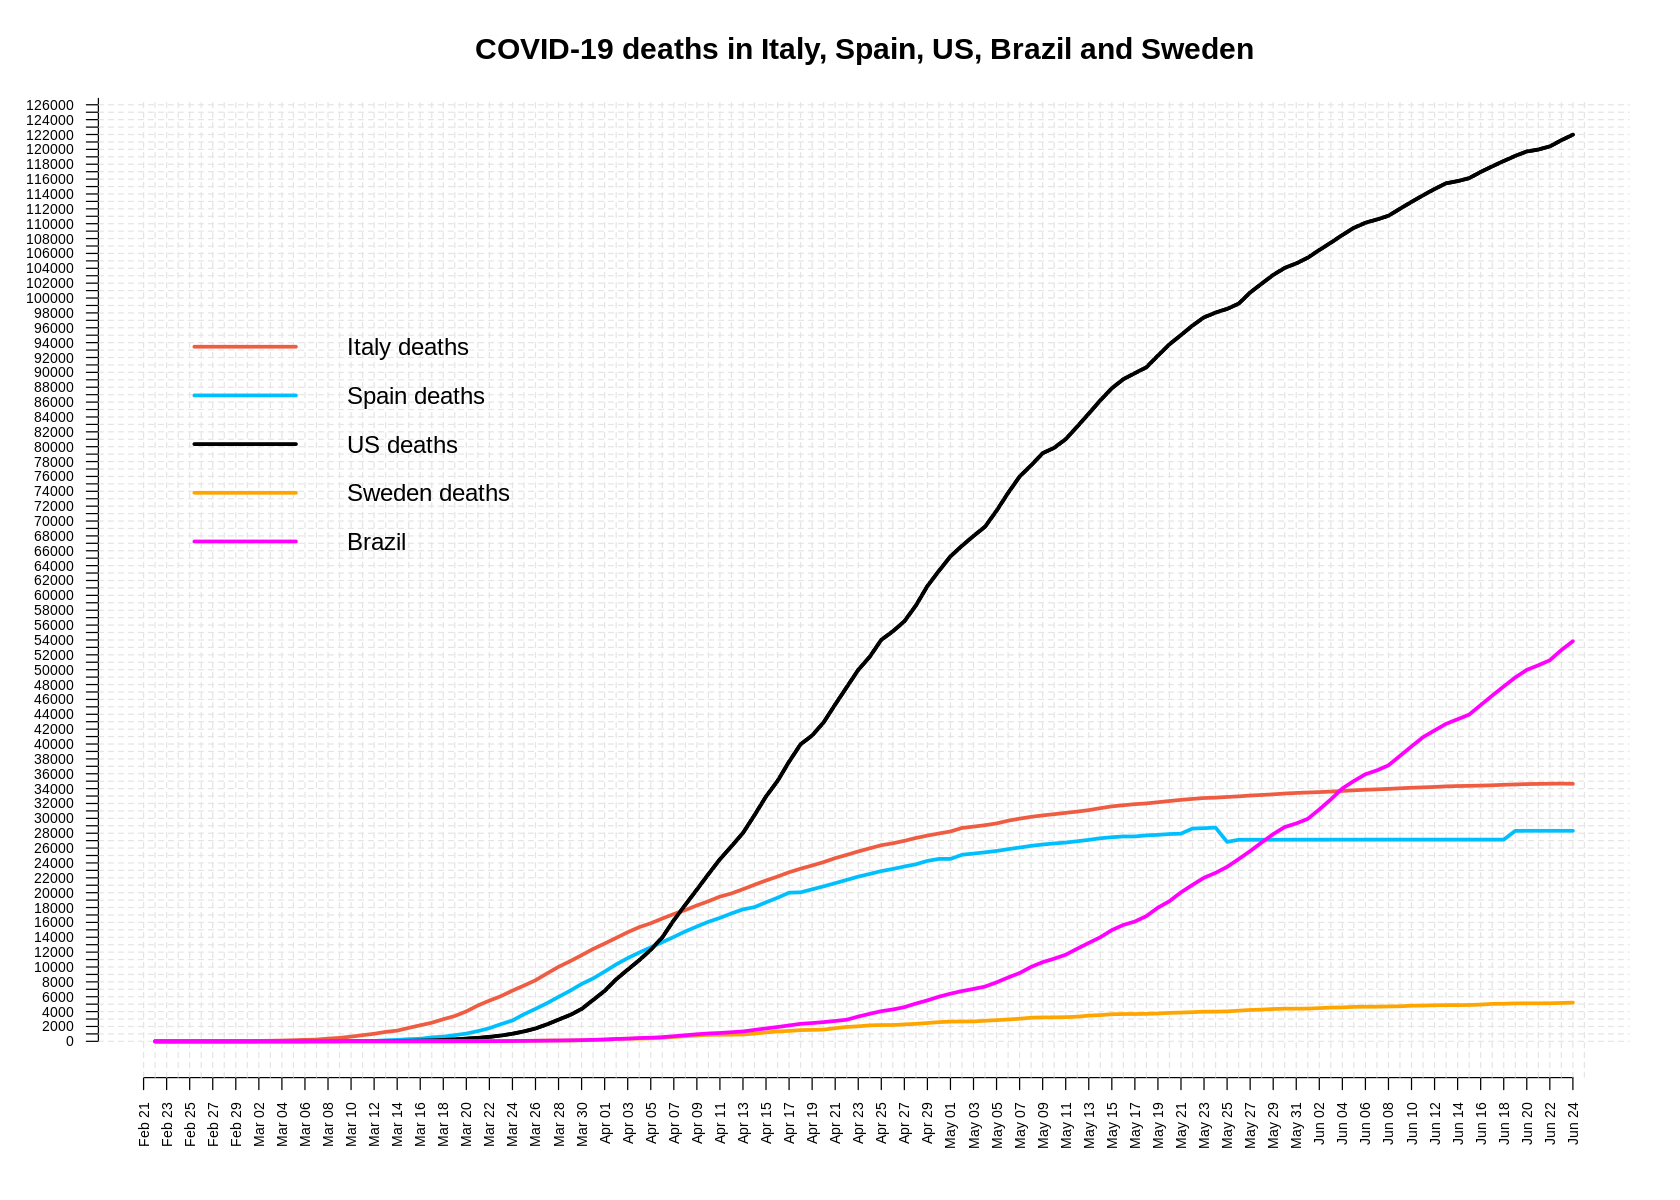

In [7]:
# Plot of the cummulative number of deaths per country:

plot(ccwd$date, ccwd$US, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     main ='COVID-19 deaths in Italy, Spain, US, Brazil and Sweden',
     axes=FALSE,
     cex.main=1.5)

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


at2 <- seq(0,200000,by=1000)
axis(side=2, at2, cex.axis=0.7, las=1)

abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
at1 <- seq(min(ccw$date), max(ccw$date)+1, by=1);
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines

lines(ccwd$date, ccwd$Italy, lwd=3, col="tomato2")
lines(ccwd$date, ccwd$Spain, lwd=3, col="deepskyblue1")
lines(ccwd$date, ccwd$US, lwd=3)
lines(ccwd$date, ccwd$Sweden, lwd=3, col='orange')
lines(ccwd$date, ccwd$Brazil, lwd=3, col='magenta')

legend(ccw$date[1], 100000, bg="transparent",
       legend=c("Italy deaths", "Spain deaths", "US deaths", "Sweden deaths","Brazil"),
       col=c("tomato2", "deepskyblue1", 1, 'orange','magenta'), lty=c(1,1,1,1,1), lwd=3, cex=1.2,
       box.lty=0)


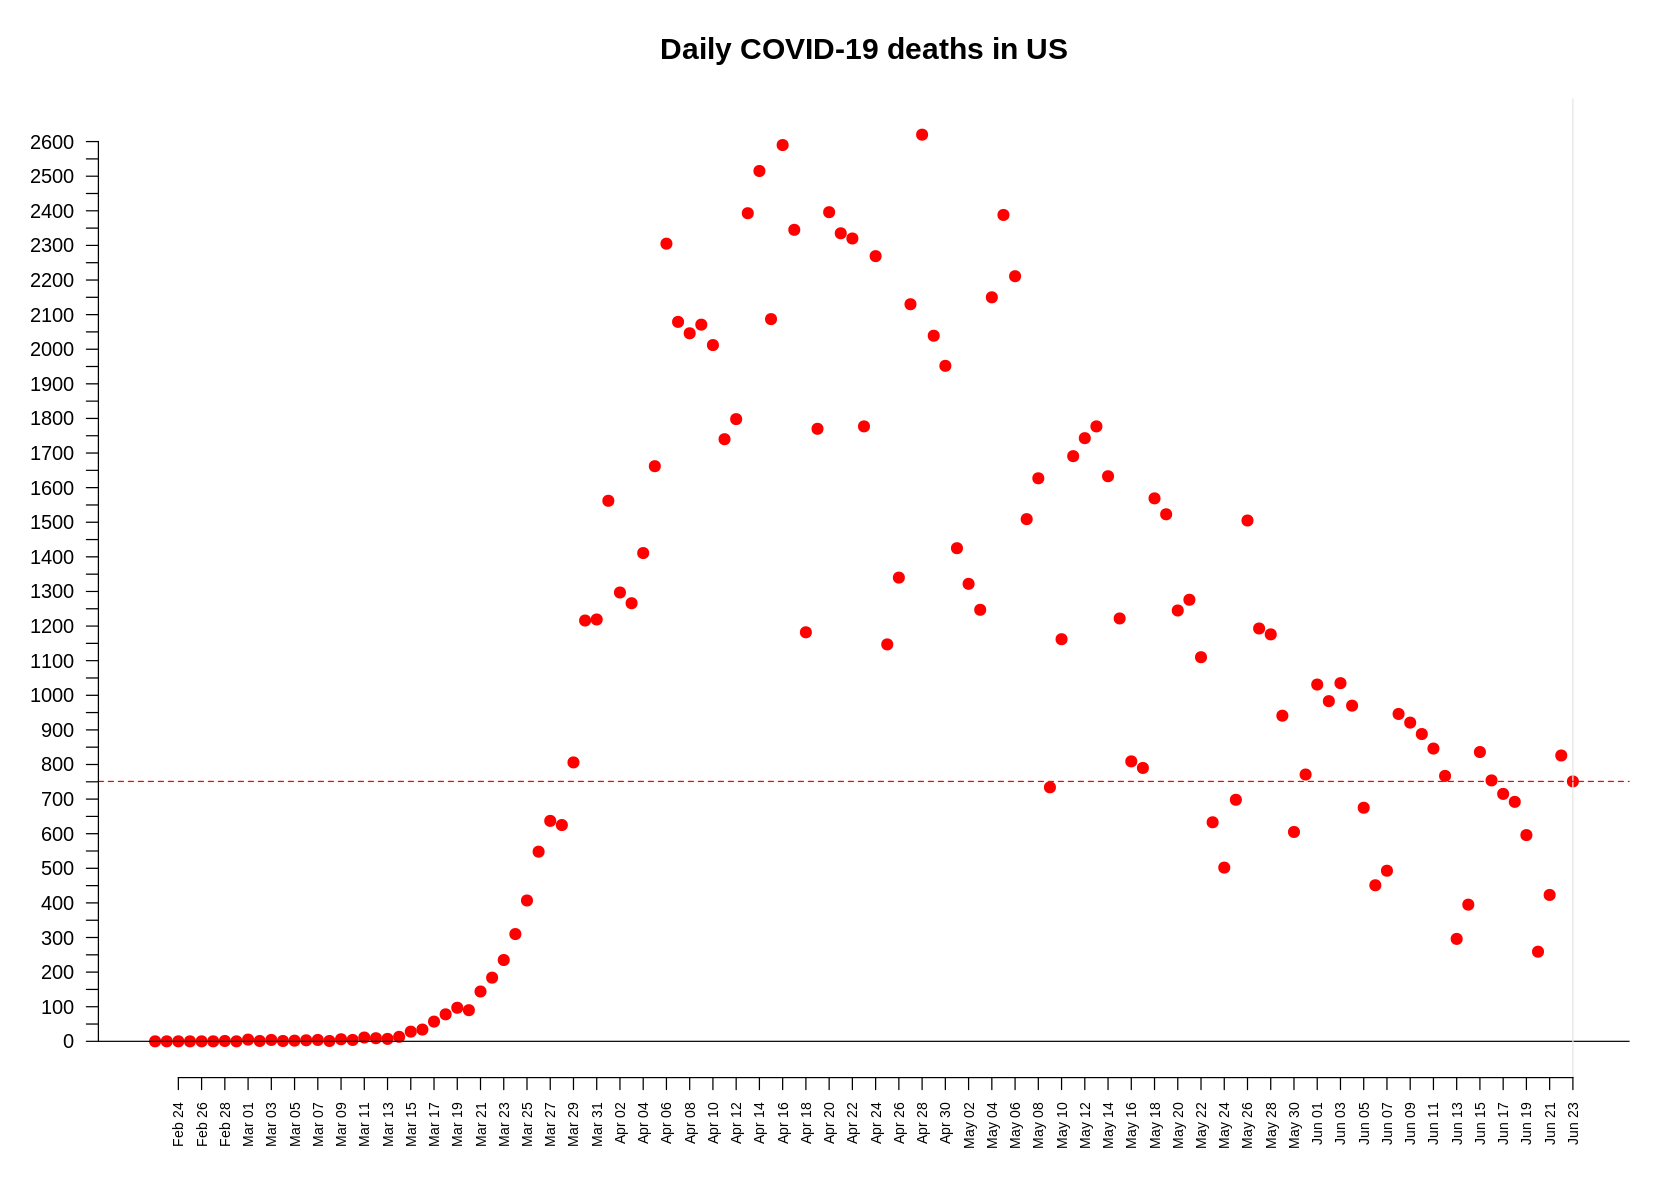

In [8]:
f.der<-diff(ccwd$US, lag = 1, differences = 1)

plot(ccwd$date[2:length(ccwd$date)-1], f.der, 
     pch = 19, cex = 1.2,
     ylab='', 
     xlab='',
     main ='Daily COVID-19 deaths in US',
     col="red",
     axes=FALSE,
     cex.main=1.5)

abline(h=0)
abline(v=ccwd$date[length(ccwd$date)-1], col='gray90')
abline(h=f.der[length(ccwd$date)-1], col='red', lty=2)

at1 <- seq(min(ccwd$date)+2, max(ccwd$date), by=2)
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

axis(side=2, seq(min(f.der),max(f.der), 50), 
     las=2, cex.axis=1)

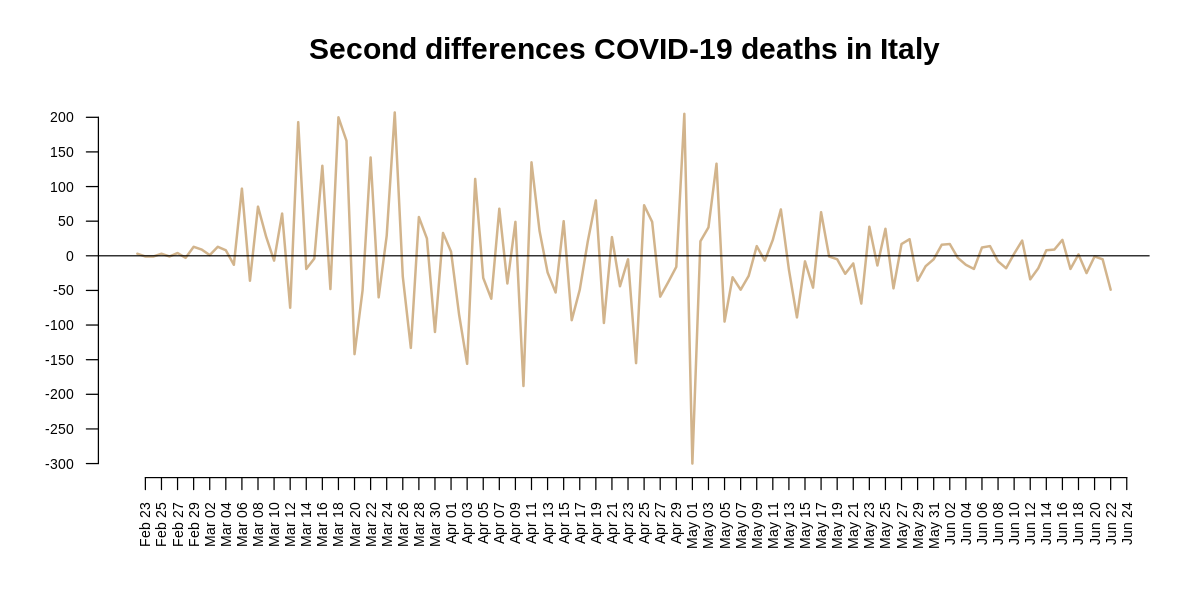

In [9]:
# Analyzing second differences in the number of deaths in Italy:

options(repr.plot.width=10, repr.plot.height=5)


first.der<-diff(ccwd$Italy, lag = 1, differences = 1)
sec.der <- diff(ccwd$Italy, lag = 1, differences = 2)

plot(ccwd$date[2:length(ccwd$date)-2], sec.der, 
     type="l", lwd=2, lty=1,
     ylab='', 
     xlab='',
     main ='Second differences COVID-19 deaths in Italy',
     col="tan",
     axes=FALSE,
     cex.main=1.5)
abline(h=0)
at1 <- seq(min(ccw$date)+2, max(ccw$date), by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
axis(side=2, seq(min(sec.der),max(sec.der),50), 
     las=2, cex.axis=0.7)

#require(tseries)
#require(forecast)
#require(astsa)
#dif<-diff(ccwdpred$Italy)
#fit = auto.arima(dif)
#pred = predict(fit, n.ahead = 50)
#ts.plot(dif, pred$pred, lty = c(1,3), col=c(5,2))
#gtemp_pred<-gtemp[length(gtemp)]
#for(i in 1:length(pred$pred)){
#  gtemp_pred[i+1]<-gtemp_pred[i]+pred$pred[i]
#}
#plot(c(gtemp,gtemp_pred),type="l")

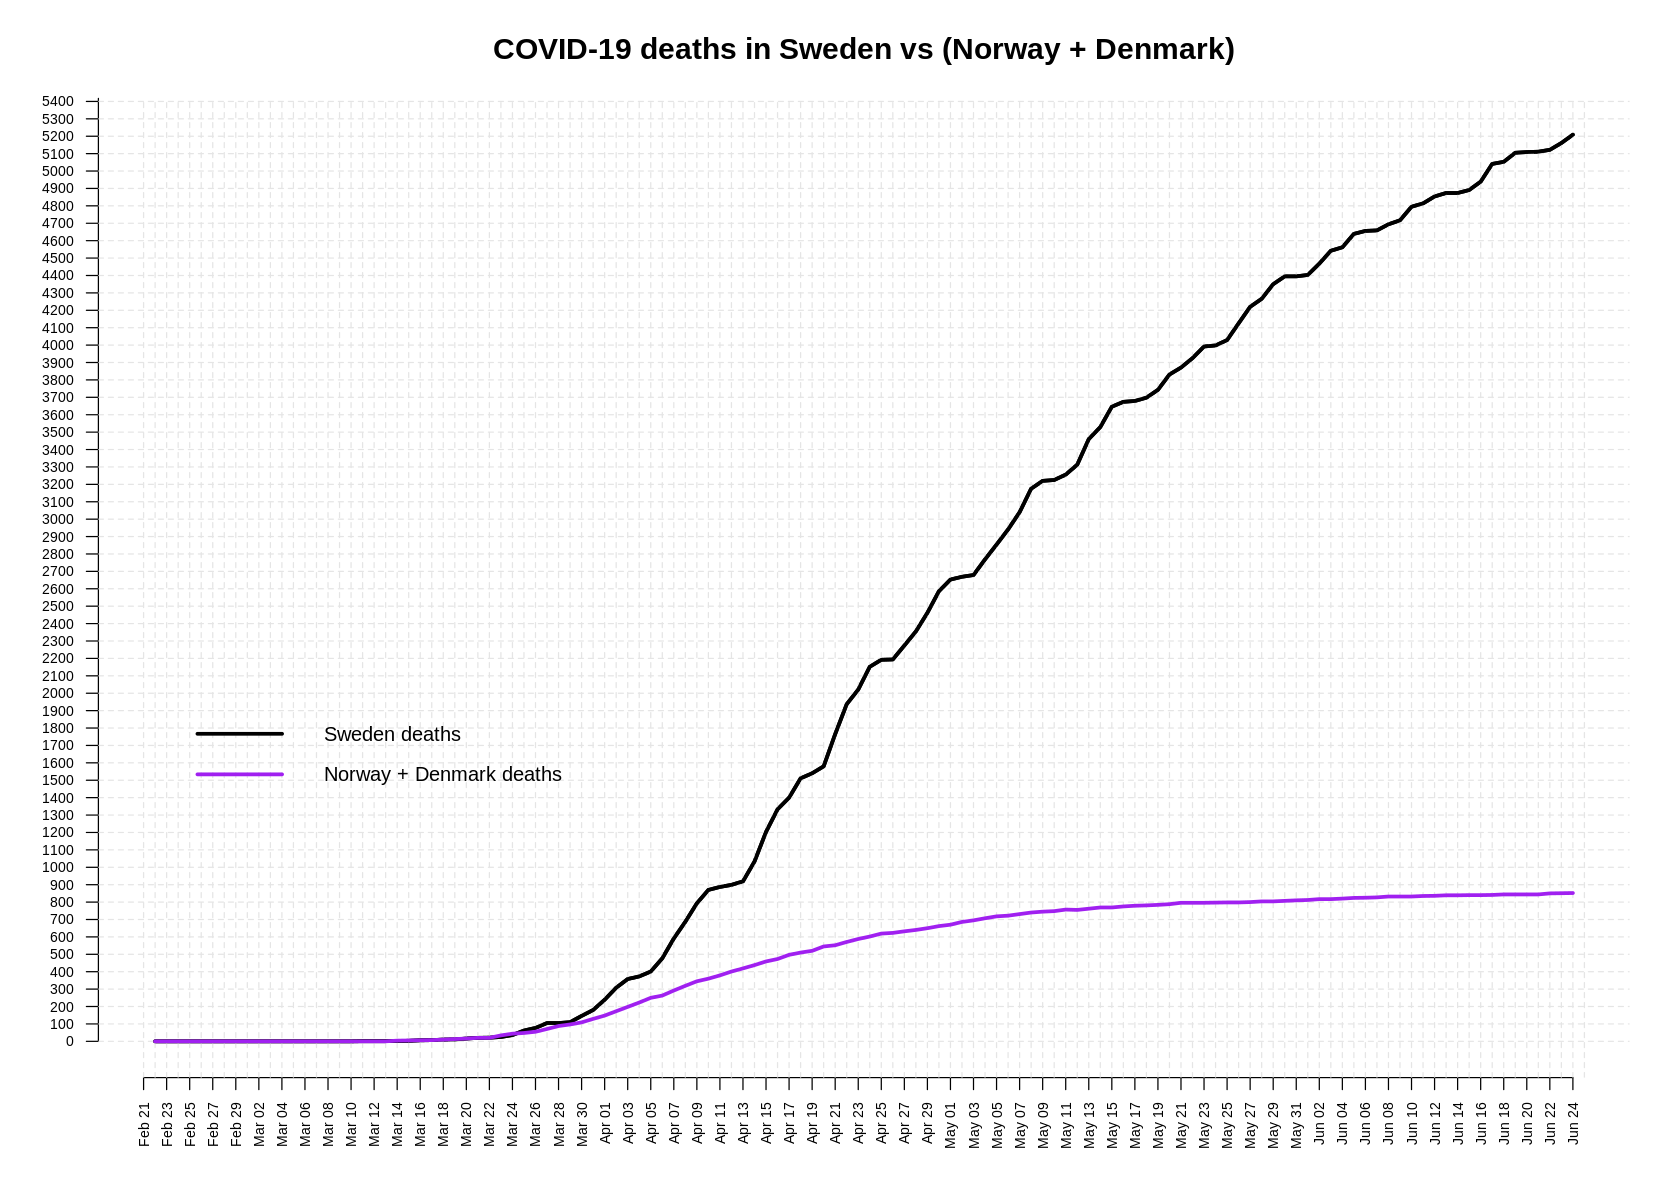

In [10]:
# Cummulative number of deaths in Sweden compared to Norway + DenmarK:

options(repr.plot.width=14, repr.plot.height=10)


plot(ccwd$date, ccwd$Sweden, 
      type="l", lwd=3, lty=1,
      ylab='', 
      xlab='',
      main ='COVID-19 deaths in Sweden vs (Norway + Denmark)',
      axes=FALSE,
      cex.main=1.5)

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


at2 <- seq(0,10000,by=100)
axis(side=2, at2, cex.axis=0.7, las=1)

abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
at1 <- seq(min(ccw$date), max(ccw$date)+1, by=1);
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines

lines(ccwd$date, ccwd$Sweden, lwd=3, col=1)
lines(ccwd$date, ccwd$Norway + ccwd$Denmark, lwd=3, col='purple')

legend(ccwd$date[1], 2000, bg="transparent",
       legend=c("Sweden deaths", "Norway + Denmark deaths"),
       col=c(1, 'purple'), lty=c(1,1), lwd=3, cex=1,
       box.lty=0)


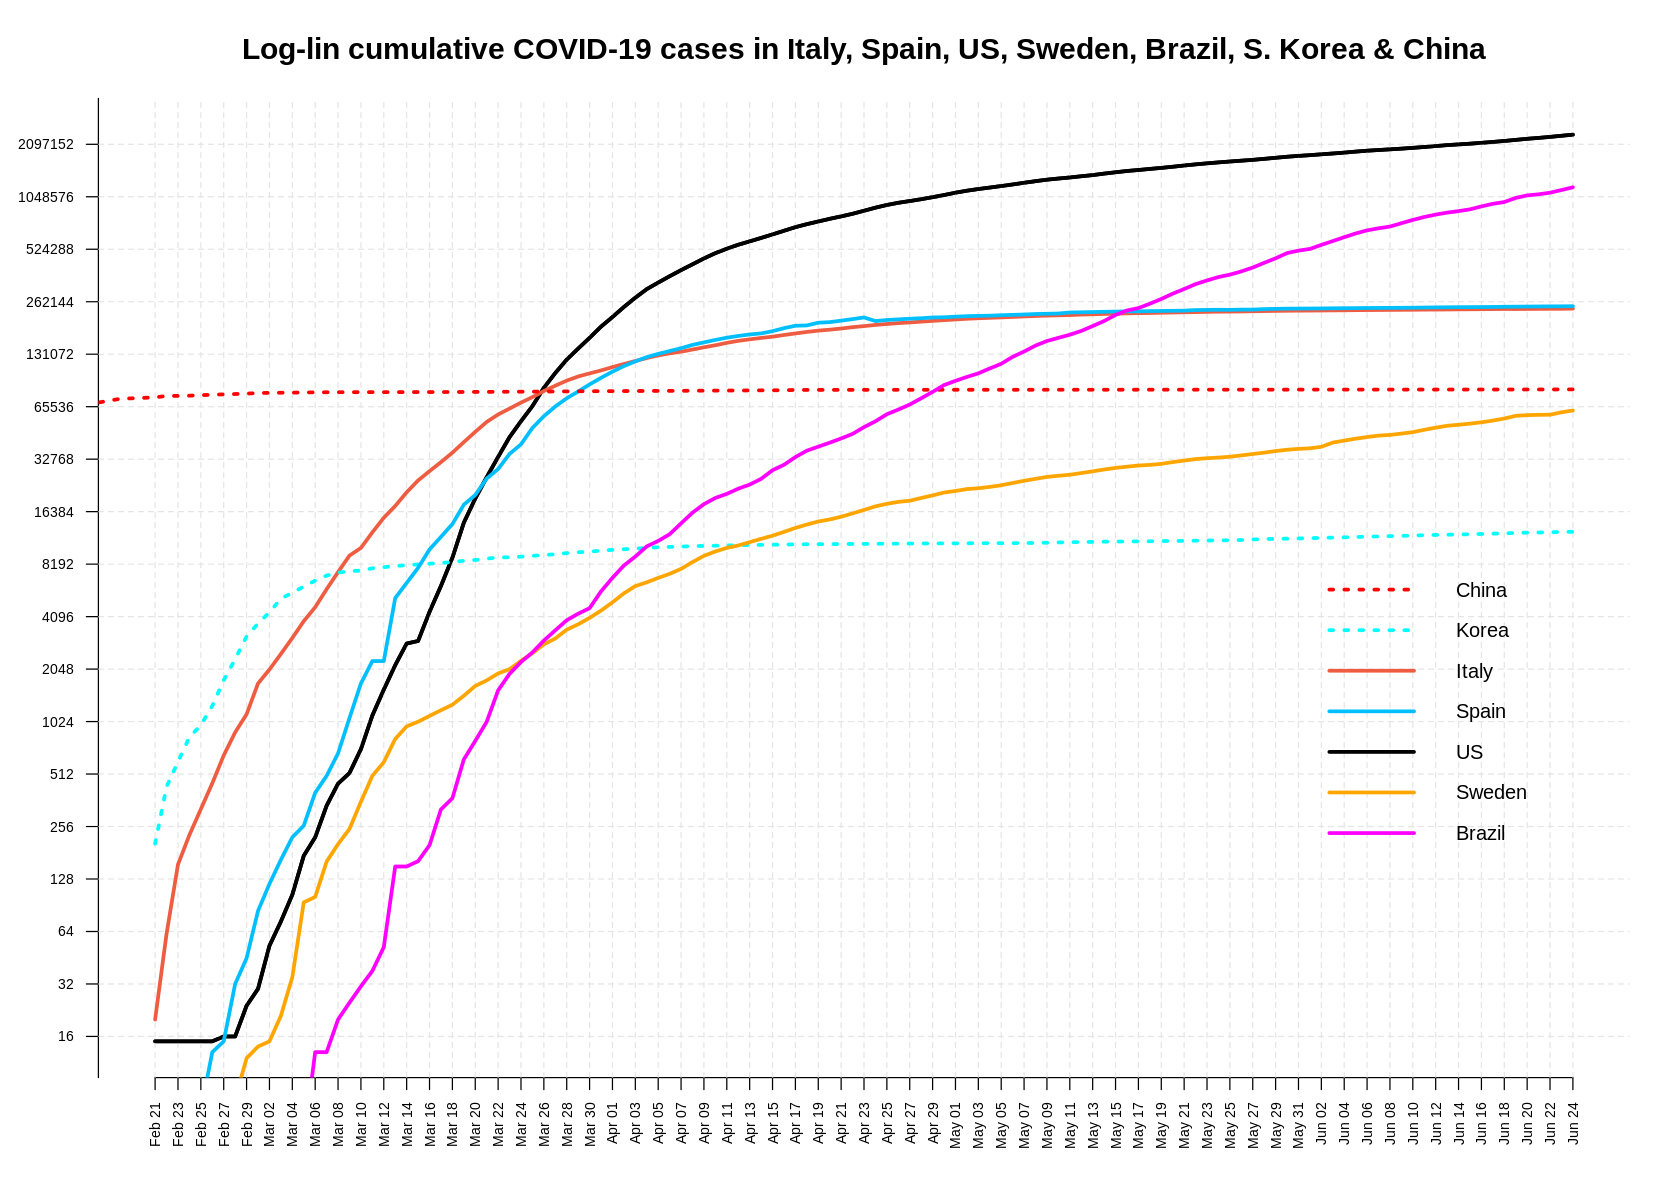

In [11]:
# Log-lin plot of cummulative number of cases by country:

plot(ccw$date, ccw$US, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     log='y',
     col=1,
     axes=FALSE,
     main = "Log-lin cumulative COVID-19 cases in Italy, Spain, US, Sweden, Brazil, S. Korea & China",
     cex.main=1.5)

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)


at2 <- 2^seq(1,30,by=1)
axis(side=2, at2, cex.axis=0.7, las=2)

abline(h=at2, lty=2, col="grey90")  # Add faint grid lines
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines


lines(ccw$date, ccw$US, type="l", lwd=3, col=1)
lines(ccw$date, ccw$Italy, type="l", lwd=3, col="tomato2")
lines(ccw$date, ccw$`Korea, South`, lwd=3, col=5, lty=3)
lines(ccw$date, ccw$Spain, lwd=3, col="deepskyblue1")
lines(ccw_china$date, ccw_china$China, lwd=3, lty= 3, col='red')
lines(ccw$date, ccw$Sweden, lwd=3, col="orange")
lines(ccw$date, ccw$Brazil, lwd=3, col="magenta")

legend(ccw$date[100], 10000, bg="transparent",
       legend=c("China", "Korea", "Italy", "Spain", "US", "Sweden","Brazil"),
       col=c("red",5,"tomato2","deepskyblue1",1,"orange","magenta"), lty=c(3,3,1,1,1,1,1), lwd=3, cex=1,
       box.lty=0)

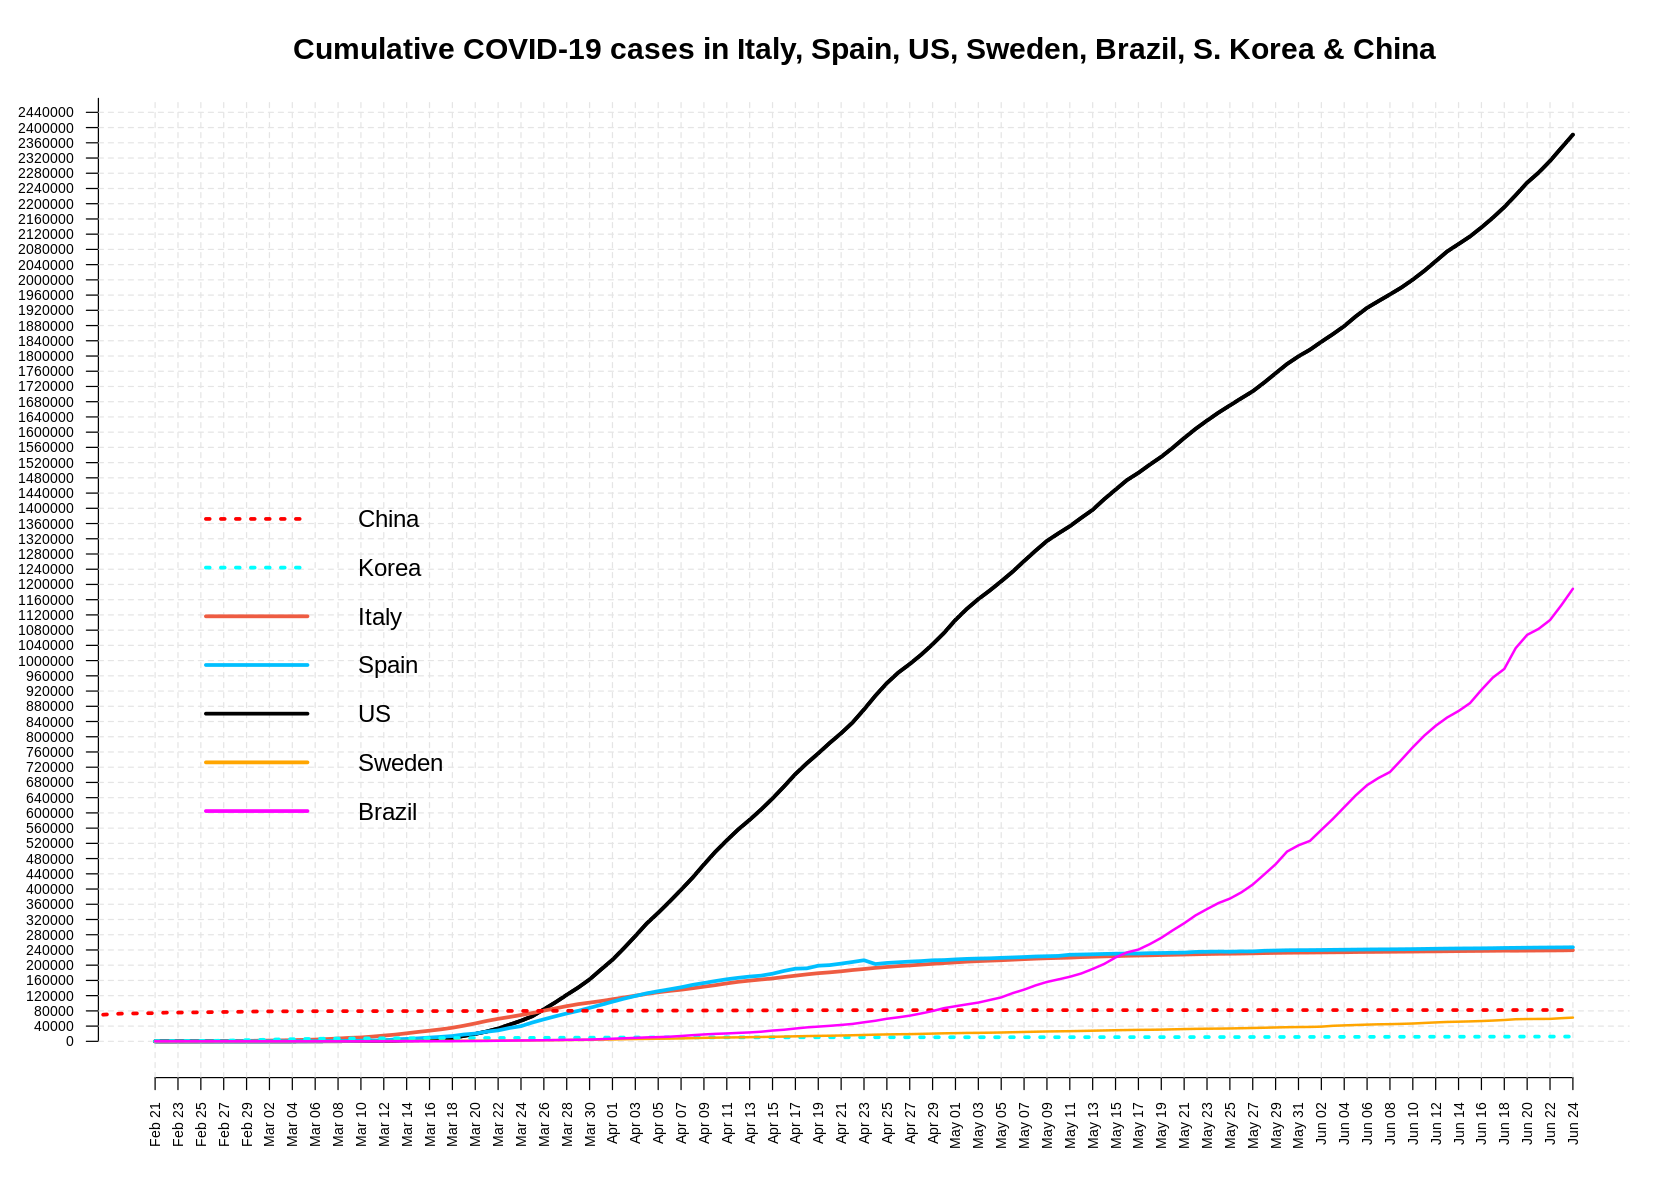

In [12]:
# Cummulative number of cases by country:

options(repr.plot.width=14, repr.plot.height=10)

plot(ccw$date, ccw$US, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     col=1,
     axes=F,
     cex.axis=1,
     las=2,
     main = "Cumulative COVID-19 cases in Italy, Spain, US, Sweden, Brazil, S. Korea & China",
     cex.main=1.5,
     bty='l')

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- seq(0, 10000000, by=40000);
axis(side=2, at2, cex.axis=0.7, las=2)

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

lines(ccw$date, ccw$US, lwd=3, col=1)
lines(ccw$date, ccw$Italy, lwd=3, col="tomato2")
lines(ccw$date, ccw$Spain, lwd=3, col="deepskyblue1")
lines(ccw$date, ccw$`Korea, South`, lwd=3, lty=3, col=5)
lines(ccw_china$date, ccw_china$China, lwd=3, lty=3, col="red")
lines(ccw$date, ccw$Sweden, lwd=2, lty=1, col="orange")
lines(ccw$date, ccw$Brazil, lwd=2, lty=1, col="magenta")

legend(ccw$date[1], 1500000, bg="transparent",
       legend=c("China","Korea", "Italy", "Spain", "US", "Sweden","Brazil"),
       col=c("red",5,"tomato2", "deepskyblue1", 1, "orange","magenta"), lty=c(3,3,1,1,1,1,1), lwd=3, cex=1.2,
       box.lty=0)

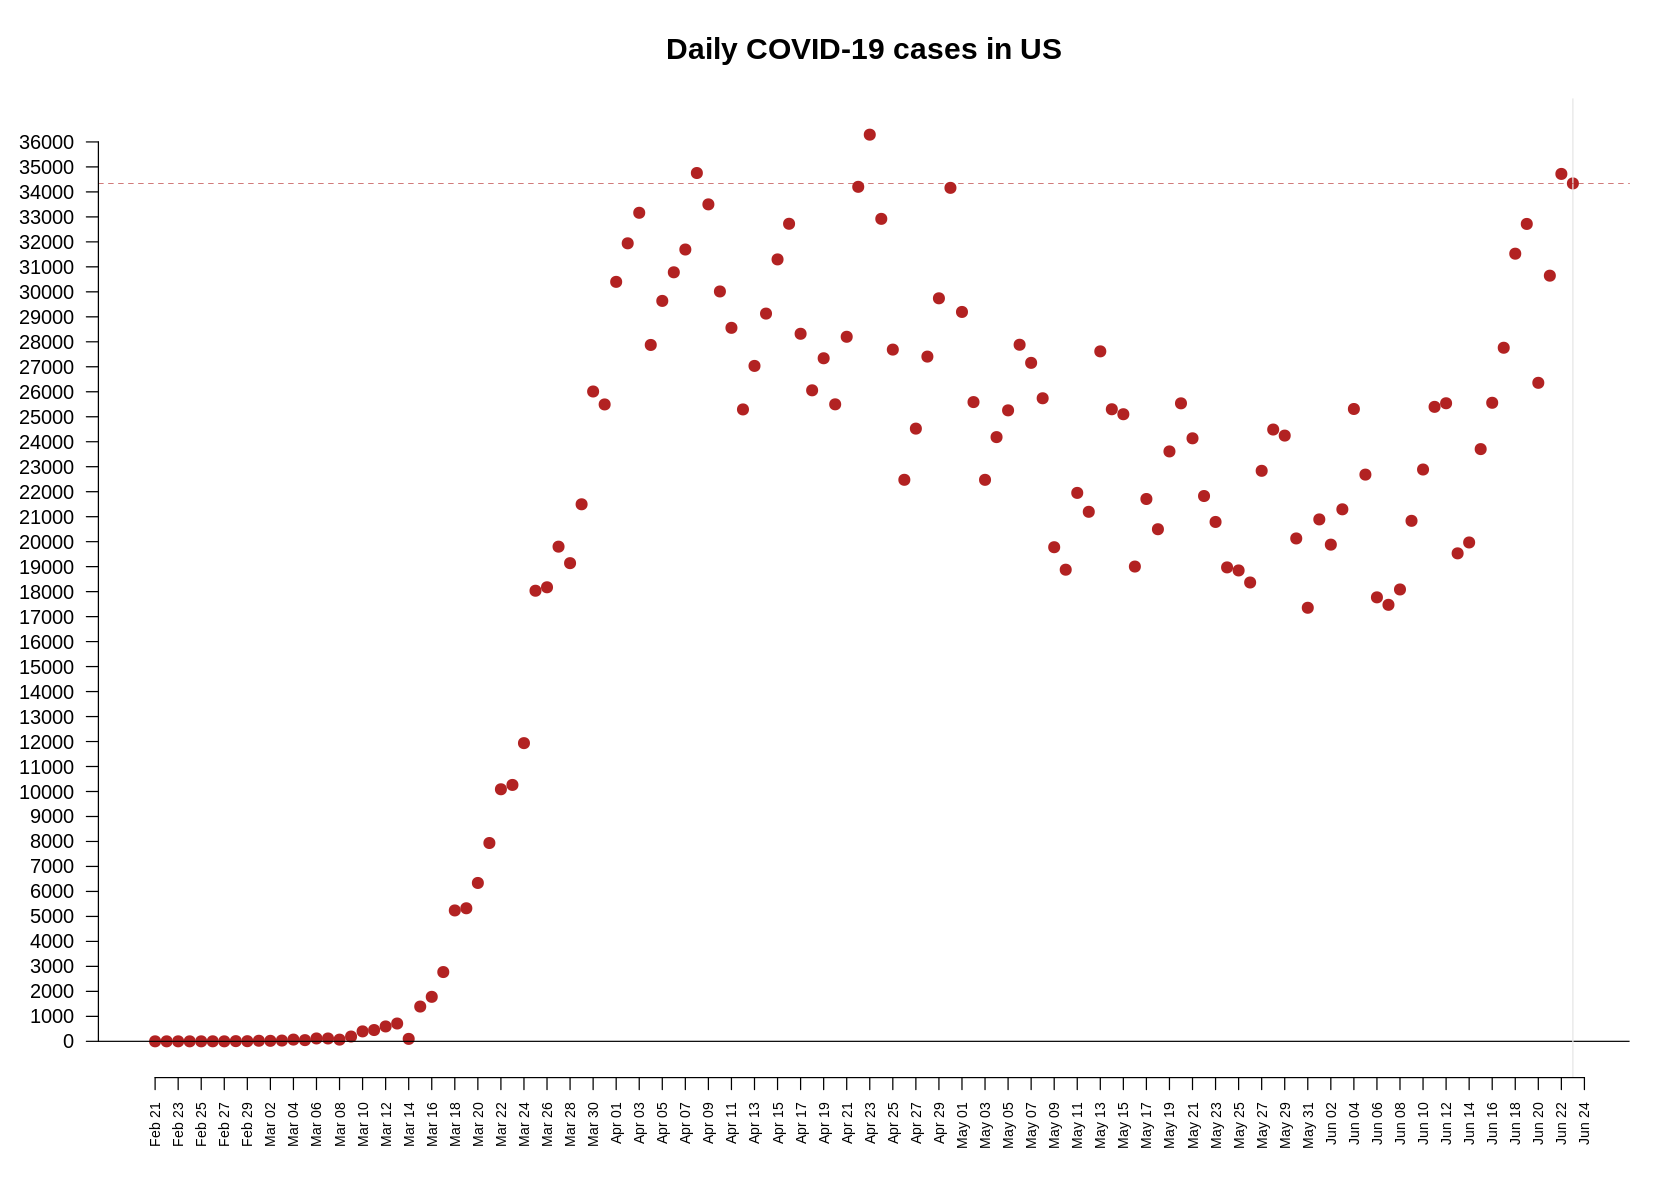

In [13]:
first.der<-diff(ccw$US, lag = 1, differences = 1)

plot(ccw$date[2:length(ccw$date)-1], first.der, 
     pch = 19, cex = 1.2,
     ylab='', 
     xlab='',
     main ='Daily COVID-19 cases in US',
     col="firebrick",
     axes=FALSE,
     cex.main=1.5)
abline(h=0)
abline(v=ccw$date[length(ccw$date)-1], col='gray90')
abline(h=first.der[length(ccw$date)-1], col='firebrick', lty=2, lwd=.5)

at1 <- seq(min(ccw$date), max(ccw$date), by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)
axis(side=2, seq(min(first.der),max(first.der),1000), 
     las=2, cex.axis=1)

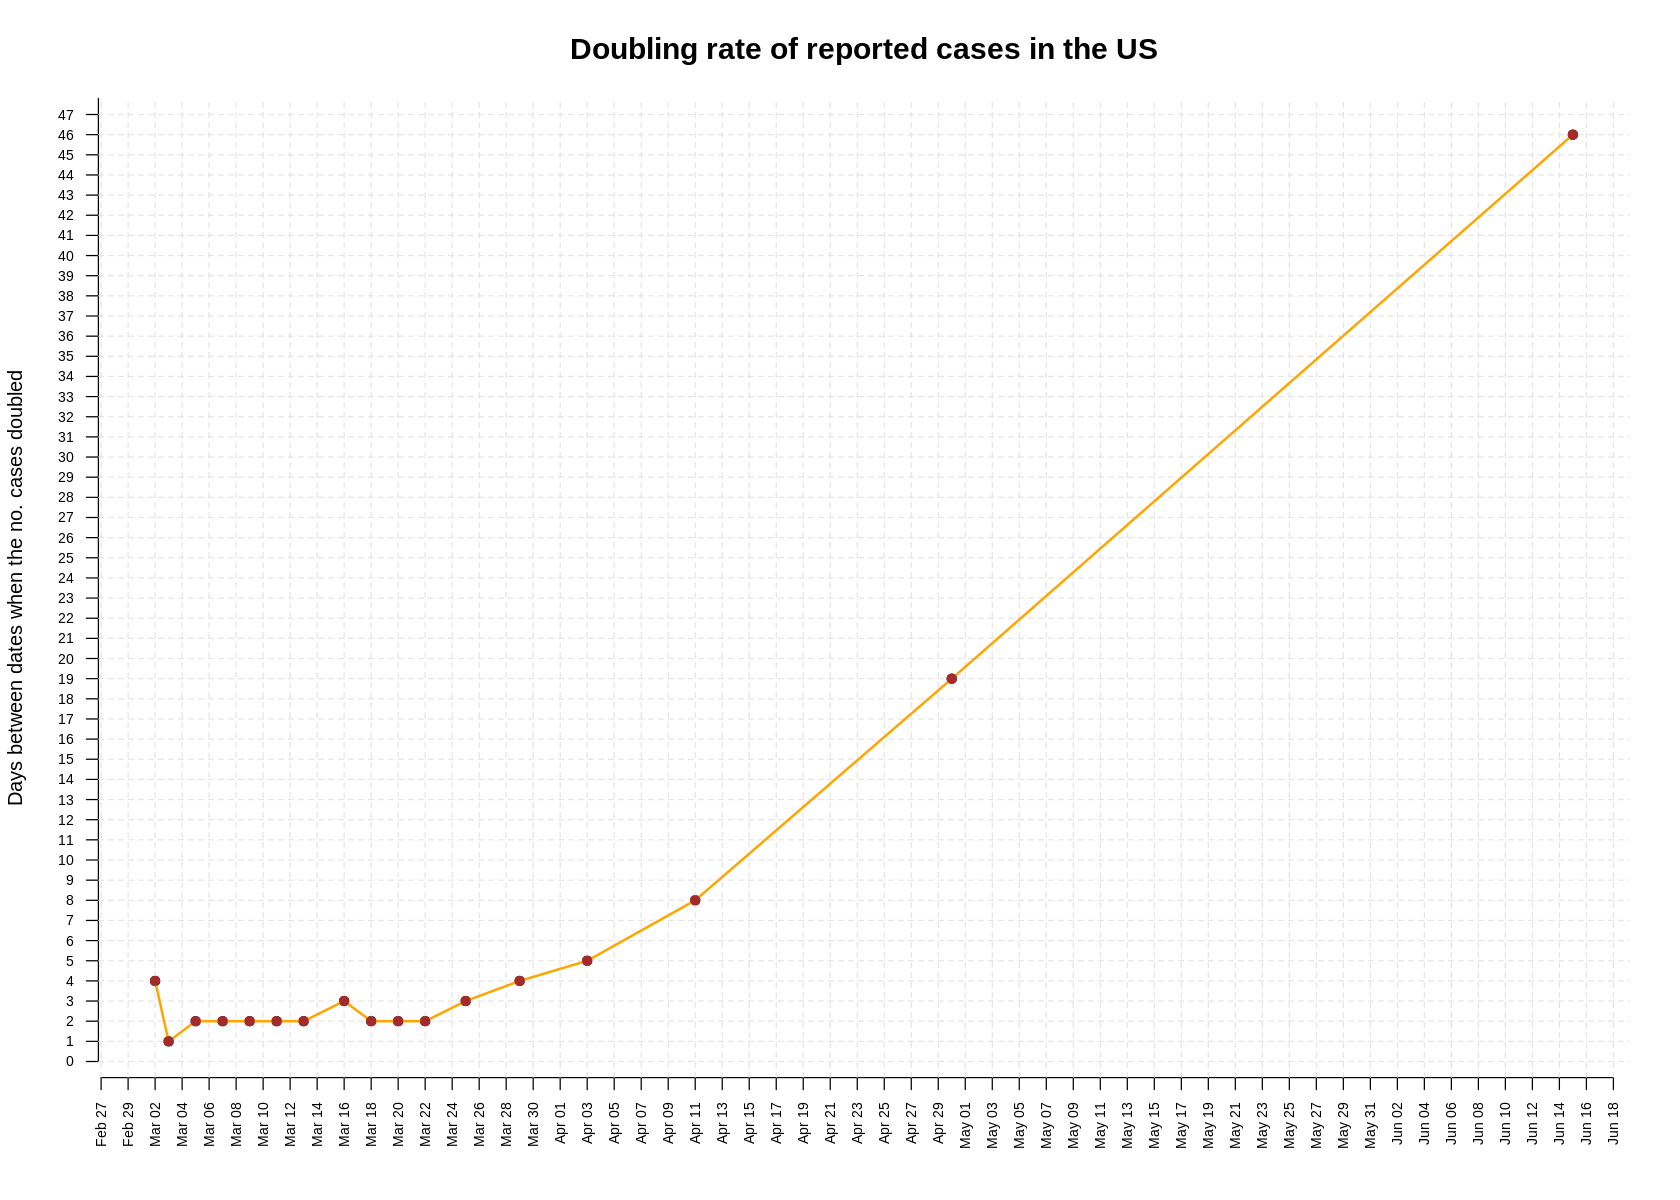

In [14]:
# Doubling time in the number of cases in the US:

v <- numeric(0)
for (i in 1:length(2^seq(3,floor(log2(max(ccw$US)))))){
  v[i] <- min(which(ccw$US >= 2^seq(3,floor(log2(max(ccw$US))))[i]))
}

x2dates <- ccw[unique(v),]


doubling_times <- c(diff.Date(x2dates$date)[1],diff.Date(x2dates$date))
x2dates <- cbind(x2dates,doubling_times)
x2dates <- x2dates[3:nrow(x2dates),]
plot(x2dates$date, x2dates$doubling_times, 
     pch=19,
     xlab='',
     ylab='Days between dates when the no. cases doubled',
     axes=F,
     cex.axis=0.7,
     las=2,
     main = "Doubling rate of reported cases in the US",
     cex.main=1.5,
     bty='l')


at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- seq(0, 50, by=1);
axis(side=2, at2, cex.axis=0.7, las=2)
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines


lines(x2dates$date, x2dates$doubling_times, lwd=2, col="orange")
points(x2dates$date, x2dates$doubling_times, pch=19, col="brown")

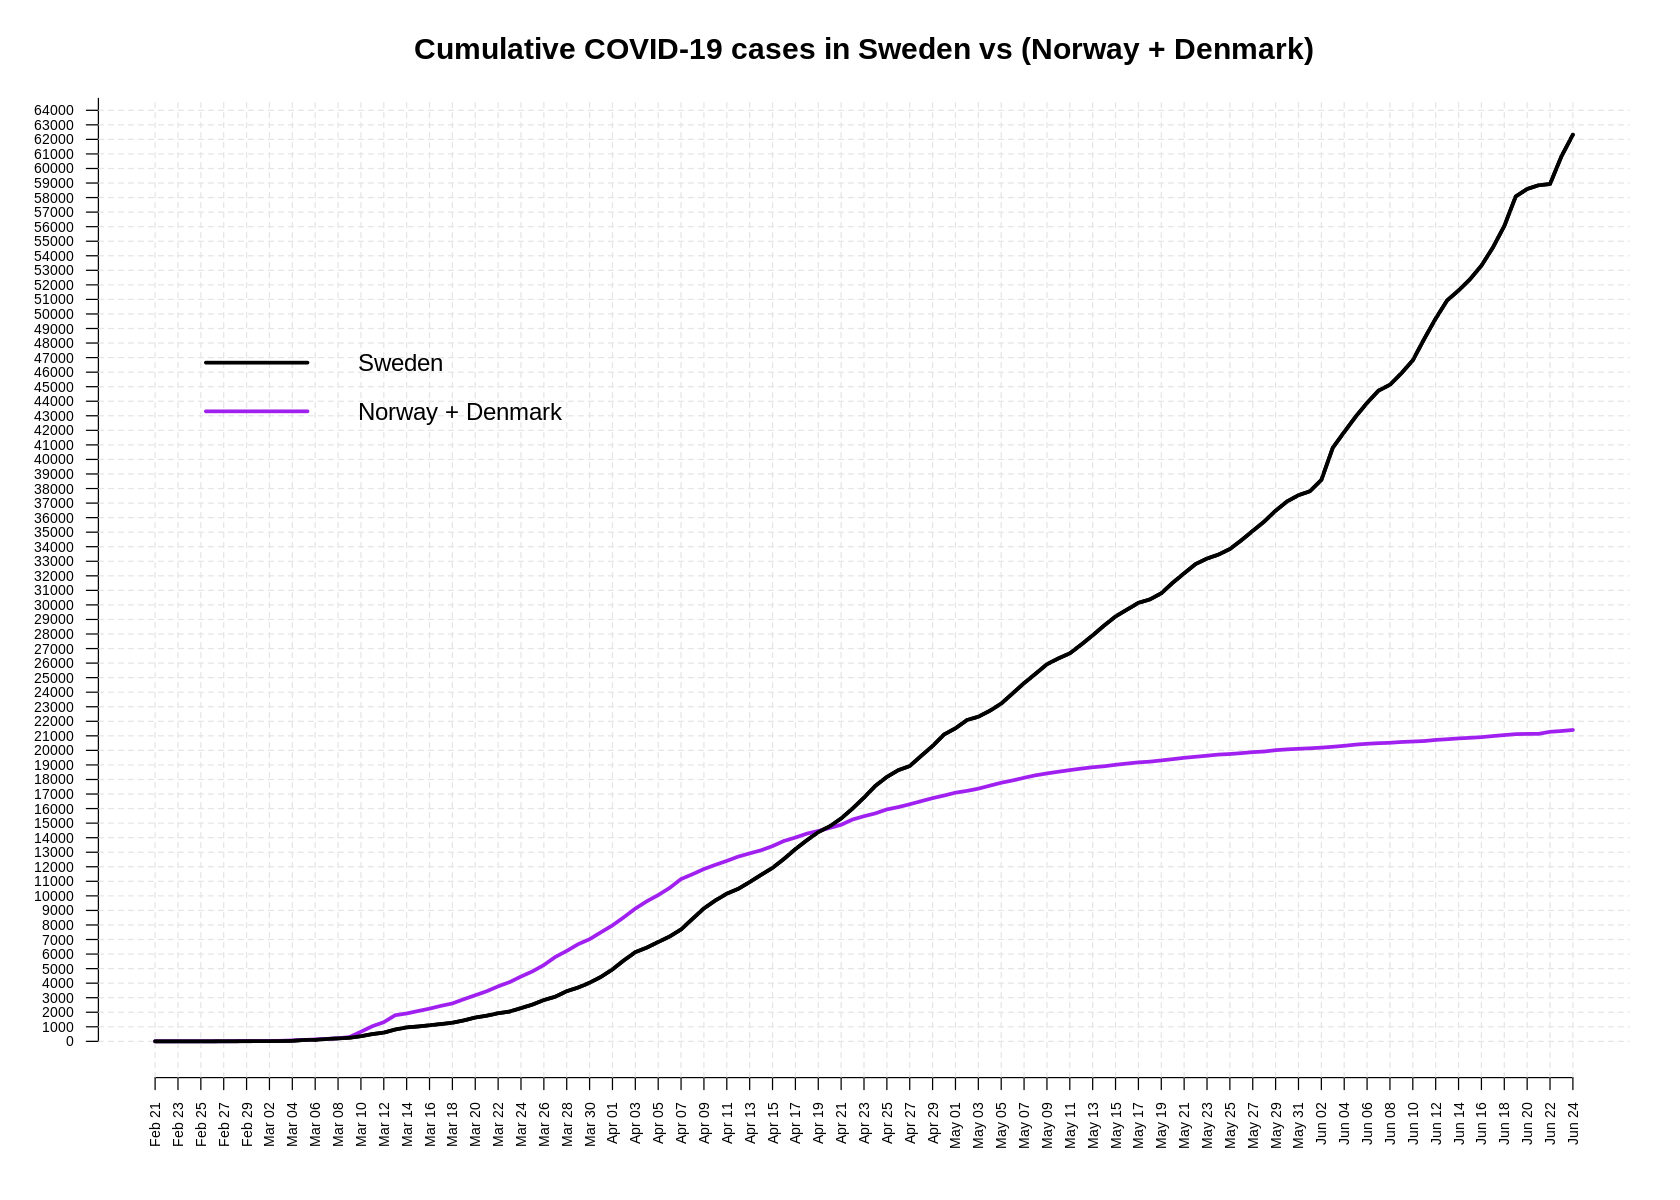

In [15]:
# Comparison in the number of cases in Sweden versus Norway + Denmark:

plot(ccw$date, ccw$Sweden, type="l", lwd=3, lty=1,
     ylab='', 
     xlab='',
     col=1,
     axes=F,
     cex.axis=0.7,
     las=2,
     main = "Cumulative COVID-19 cases in Sweden vs (Norway + Denmark)",
     cex.main=1.5,
     bty='l')

at1 <- seq(min(ccw$date), max(ccw$date)+1, by=2);
axis.Date(1, at=at1, format="%b %d", las=2, cex.axis=0.7)

at2 <- seq(0, 100000, by=1000);
axis(side=2, at2, cex.axis=0.7, las=2)

abline(v=at1, lty=2, col="grey90")  # Add faint grid lines
abline(h=at2, lty=2, col="grey90")  # Add faint grid lines

lines(ccw$date, ccw$Norway + ccw$Denmark, lwd=3, col='purple')
lines(ccw$date, ccw$Sweden, lwd=3)

legend(ccw$date[1], 50000, bg="transparent",
       legend=c("Sweden","Norway + Denmark"),
       col=c(1,'purple'), lty=c(1,1), lwd=3, cex=1.2,
       box.lty=0)


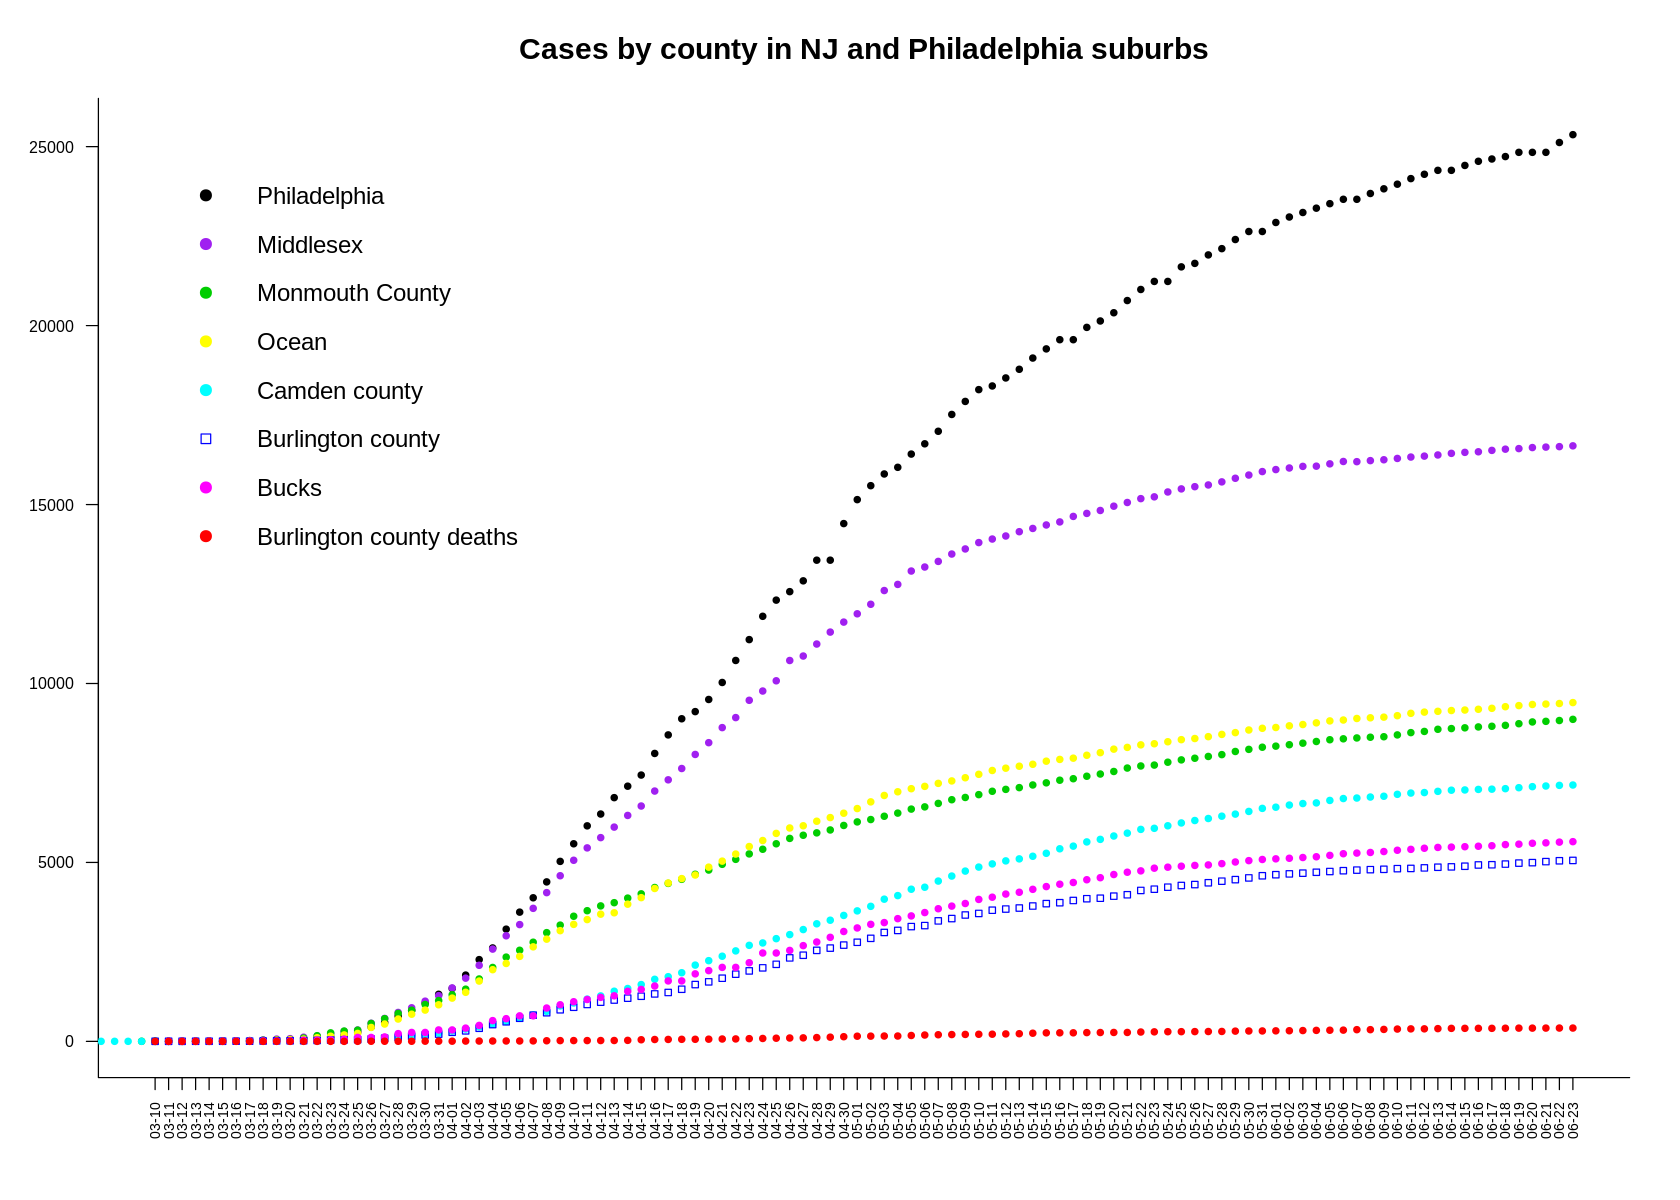

In [16]:
# Cases by county in NJ and Philadelphia suburbs:

options(repr.plot.width=14, repr.plot.height=10)

states = read.csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", sep =",",header = T)
states <- states %>%
  mutate(date = as.POSIXct(date, format = '%Y-%m-%d'))

counties = read.csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", sep =",",header = T)
counties <- counties %>%
  mutate(date = as.POSIXct(date, format = '%Y-%m-%d'))


Burlington <- counties[counties$state=="New Jersey" & counties$county=="Burlington",]
Burlington <- droplevels(Burlington)
rownames(Burlington) <- NULL

Ocean <- counties[counties$state=="New Jersey" & counties$county=="Ocean",]
Ocean <- droplevels(Ocean)
rownames(Ocean) <- NULL

Camden <- counties[counties$state=="New Jersey" & counties$county=="Camden",]
Camden <- droplevels(Camden)
rownames(Camden) <- NULL

Monmouth <- counties[counties$state=="New Jersey" & counties$county=="Monmouth",]
Monmouth <- droplevels(Monmouth)
rownames(Monmouth) <- NULL

Middlesex <- counties[counties$state=="New Jersey" & counties$county=="Middlesex",]
Middlesex <- droplevels(Middlesex)
rownames(Middlesex) <- NULL

Philadelphia <- counties[counties$state=="Pennsylvania" & counties$county=="Philadelphia",]
Philadelphia <- droplevels(Philadelphia)
rownames(Philadelphia) <- NULL

Bucks <- counties[counties$state=="Pennsylvania" & counties$county=="Bucks",]
Bucks <- droplevels(Bucks)
rownames(Bucks) <- NULL

with(as.data.frame(Philadelphia),
     plot(date,cases,xaxt="n", xlab="", ylab="", pch=19, cex.axis=0.8, cex=0.7,
          cex.main=1.5, las=2, bty='l',
          main="Cases by county in NJ and Philadelphia suburbs"))

axis.POSIXct(1,Philadelphia$date, at=Philadelphia$date,
             labels=format(Philadelphia$date,"%m-%d"),
             las=2, cex.axis=0.7)

points(Middlesex$date, Middlesex$cases, pch=19, col="purple", cex=0.7)
points(Monmouth$date, Monmouth$cases, pch=19, col=3, cex=0.7)
points(Ocean$date, Ocean$cases, pch=19, col=7, cex=0.7)
points(Camden$date, Camden$cases, pch=19, col=5, cex=0.7)
points(Burlington$date, Burlington$cases, pch=22, col=4, cex=0.8)
points(Bucks$date, Bucks$cases, pch=19, col=6, cex=0.7)



legend(Philadelphia$date[1], 25000, bg="transparent",
       legend=c("Philadelphia", "Middlesex", "Monmouth County", "Ocean", 
                "Camden county",
                "Burlington county", "Bucks",
                "Burlington county deaths"),
       col=c(1, "purple",3, 7,5, 4, 6, 2), 
       pch=c(19,19,19,19,19,22,19,19), cex=1.2, box.lty=0)    

with(as.data.frame(Burlington),points(Burlington$date, Burlington$deaths, pch=19, col=2, cex=0.7))

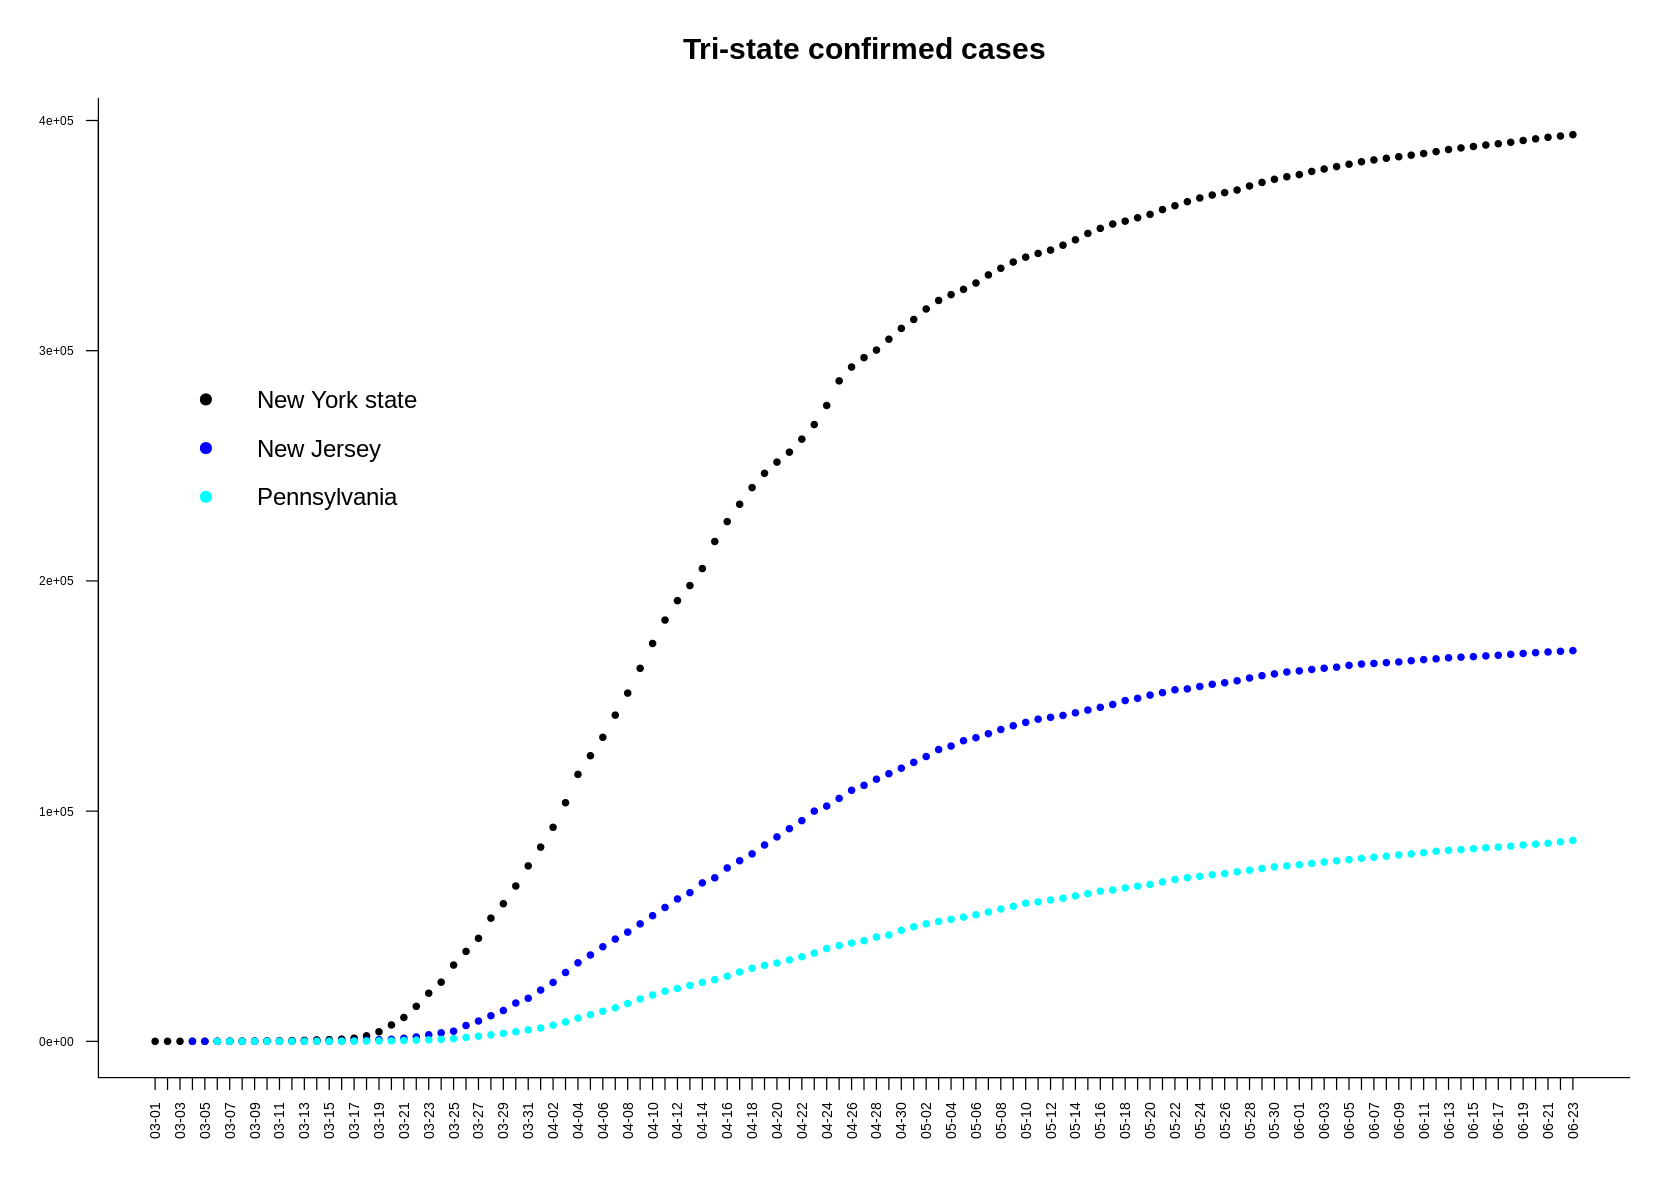

In [17]:
# Tri-state cases (NY, NJ, PA):

NJ <- states[states$state=="New Jersey",]
NJ <- droplevels(NJ)
rownames(NJ) <- NULL

NY <- states[states$state=="New York",]
NY <- droplevels(NY)
rownames(NY) <- NULL

PA <- states[states$state=="Pennsylvania",]
PA <- droplevels(PA)
rownames(PA) <- NULL

with(as.data.frame(NY),
     plot(date,cases,xaxt="n", xlab="", ylab="", pch=19, 
          cex.axis=0.6, cex=0.7,
          cex.main=1.5, las=2, bty='l',
          main="Tri-state confirmed cases"))
axis.POSIXct(1,NY$date, at=NY$date,
             labels=format(NY$date,"%m-%d"),
             las=2, cex.axis=0.7)
points(NJ$date, NJ$cases, pch=19, col=4, cex=0.7)
points(PA$date, PA$cases, pch=19, col=5, cex=0.7)

legend(NY$date[1], 300000, bg="transparent",
       legend=c("New York state", "New Jersey", "Pennsylvania"),
       col=c(1, 4, 5), pch=19, cex=1.2, box.lty=0)

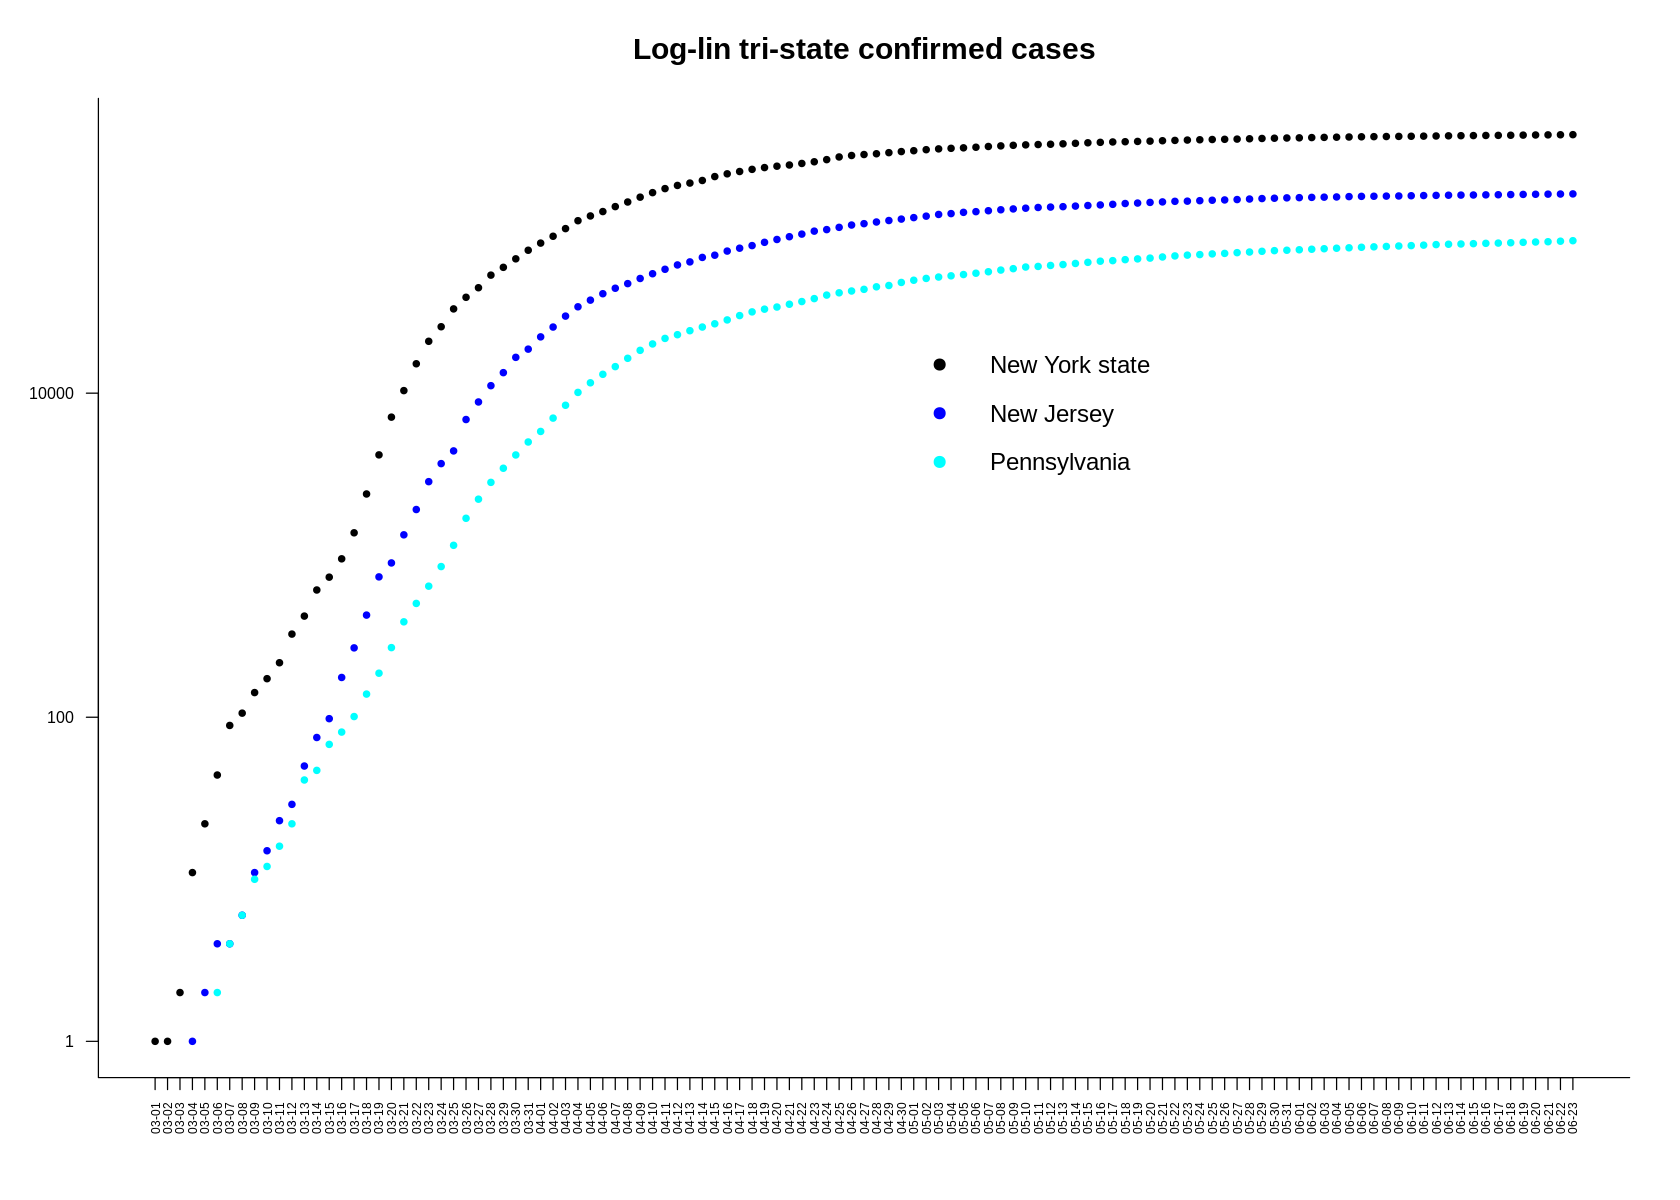

In [18]:
# Log-linear plot of cases in NY, NJ, PA:

with(as.data.frame(NY),
     plot(date,cases,xaxt="n", xlab="", ylab="", pch=19, cex.axis=0.8, cex=0.7,
          cex.main=1.5, las=2, bty='l', log='y',
          main="Log-lin tri-state confirmed cases"))
axis.POSIXct(1,NY$date, at=NY$date,
             labels=format(NY$date,"%m-%d"),
             las=2, cex.axis=0.6)
points(NJ$date, NJ$cases, pch=19, col=4, cex=0.7)
points(PA$date, PA$cases, pch=19, col=5, cex=0.7)


legend(NY$date[60], 30000,
       legend=c("New York state", "New Jersey", "Pennsylvania"),
       col=c(1, 4, 5), pch=19, cex=1.2, box.lty=0)

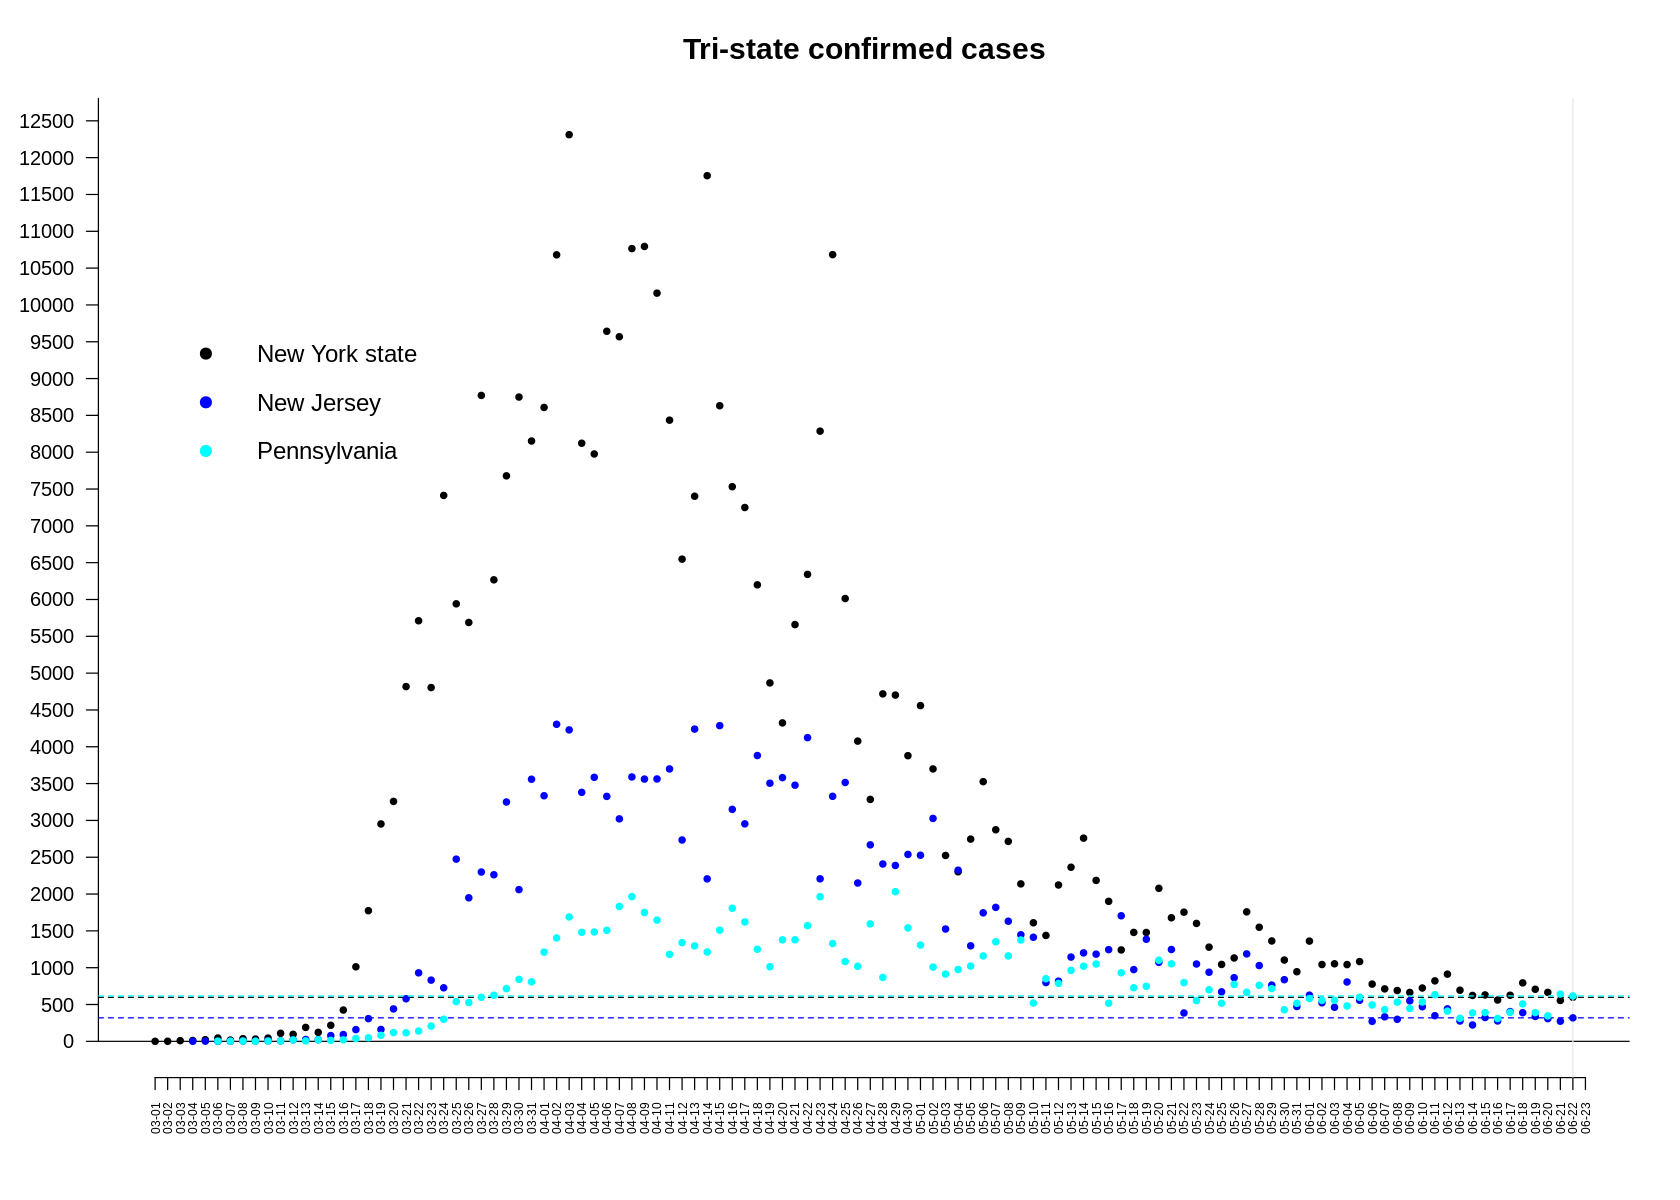

In [19]:
first.diff.NY <- diff(NY$cases, lag = 1, differences = 1)

with(as.data.frame(NY),
     plot(NY$date[2:length(NY$date)-1], first.diff.NY, 
          axes=F, 
          xlab="", ylab="", pch=19, 
          cex.axis=1.2, cex=0.7,
          cex.main=1.5, las=2, bty='l',
          main="Tri-state confirmed cases"))

axis.POSIXct(1,NY$date, at=NY$date,
             labels=format(NY$date,"%m-%d"),
             las=2, cex.axis=0.6)

at2 <- seq(0, 100000, by=500);
axis(side=2, at2, cex.axis=1, las=2)

abline(h=0)
abline(v=NY$date[length(NY$date)-1], col='gray90')
abline(h=first.diff.NY[length(NY$date)-1], lty= 2, col=1)

first.diff.NJ <- diff(NJ$cases, lag = 1, differences = 1)
first.diff.PA <- diff(PA$cases, lag = 1, differences = 1)

points(NJ$date[2:length(NJ$date)-1], first.diff.NJ, pch=19, col=4, cex=0.7)
abline(h=first.diff.NJ[length(NJ$date)-1], lty=2, col=4)
points(PA$date[2:length(PA$date)-1], first.diff.PA, pch=19, col=5, cex=0.7)
abline(h=first.diff.PA[length(PA$date)-1], lty=2, col=5)

legend(NY$date[1], 10000, bg="transparent",
       legend=c("New York state", "New Jersey", "Pennsylvania"),
       col=c(1, 4, 5), pch=19, cex=1.2, box.lty=0)

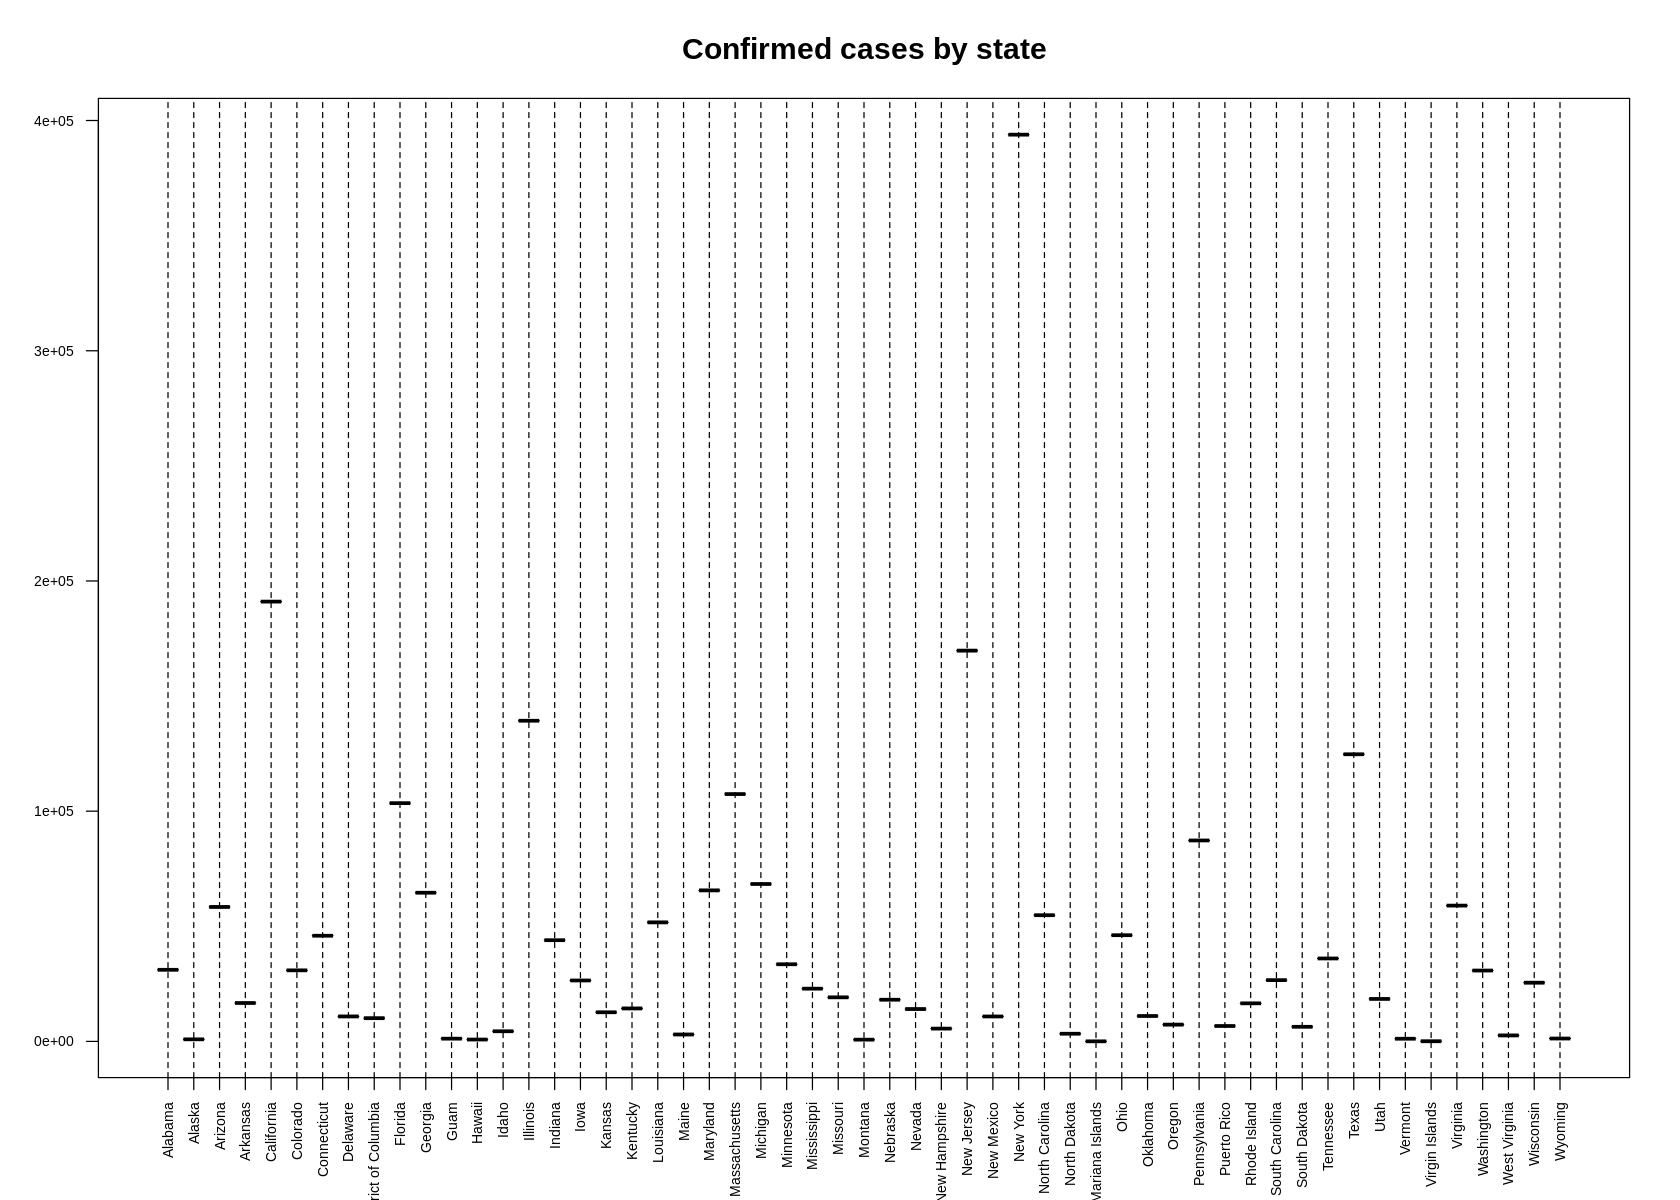

In [20]:
# Confirmed casees by state (all US):

last_day <- states[states$date==states$date[nrow(states)],]

with(last_day, plot(state, cases, las=2, cex.axis=.7, cex.main=1.5,
                    main="Confirmed cases by state",
     xlab="", ylab=""))

abline(v=seq(1,nrow(last_day),1), lty=2, lwd=1)

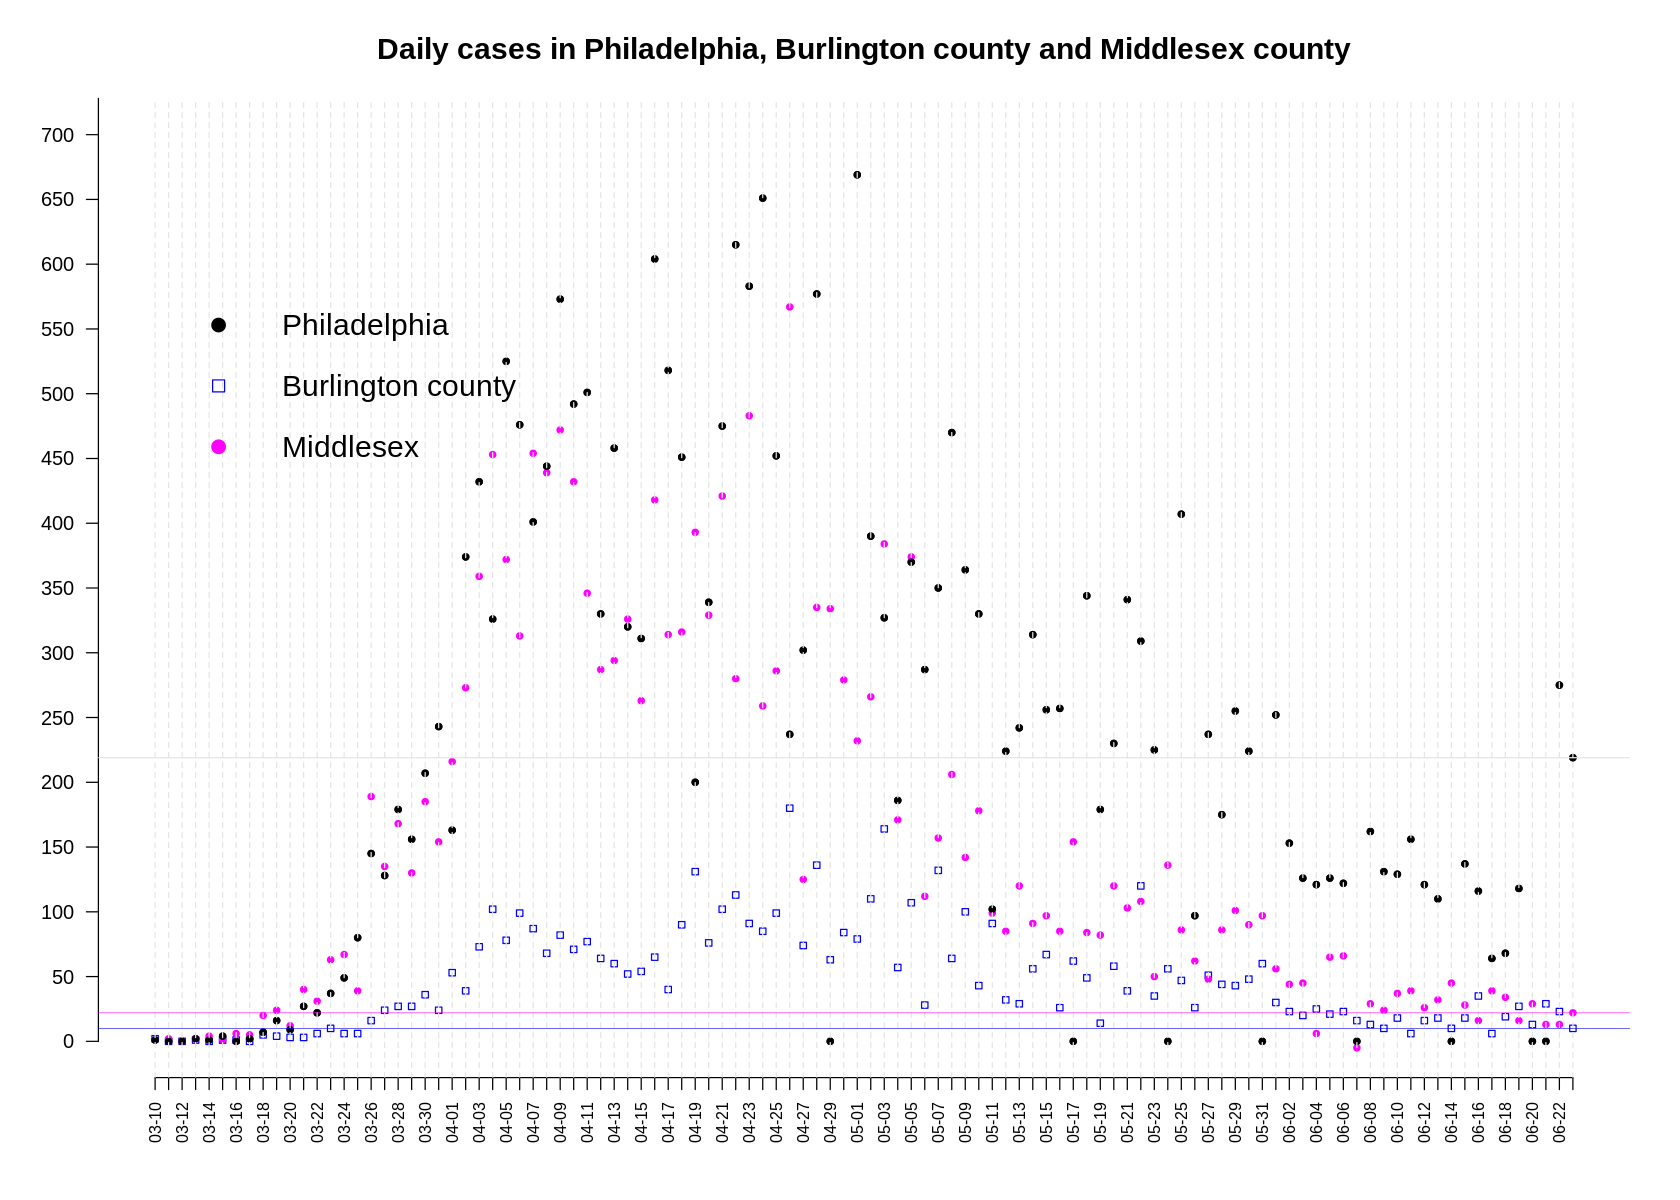

In [21]:
# Daily cases in Philadelphia, Burlington county and Middlesex county:

Philadelphia$daily <- c(Philadelphia$cases[1], diff(Philadelphia$cases,1))
with(as.data.frame(Philadelphia),
     plot(date,daily,
          axes=F, xlab="", ylab="", pch=19, 
          cex.axis=0.8, cex=0.7,
          cex.main=1.5, las=2, bty='l', ylim=c(0,700),
          main="Daily cases in Philadelphia, Burlington county and Middlesex county"))

axis.POSIXct(1,Philadelphia$date, at=Philadelphia$date,
             labels=format(Philadelphia$date,"%m-%d"),
             las=2, cex.axis=0.8)

at2 <- seq(0, 5000, by=50);
axis(side=2, at2, cex.axis=1, las=2)


Burlington$daily <- c(Burlington$cases[1], diff(Burlington$cases,1))
points(Burlington$date, Burlington$daily, pch=22, col=4, cex=0.8)
Middlesex$daily <- c(Middlesex$cases[1], diff(Middlesex$cases,1))
points(Middlesex$date, Middlesex$daily, pch=19, col=6, cex=0.7)
points(Philadelphia$date, Philadelphia$daily, pch=19, col=1, cex=0.7)
at1 <- seq(min(Philadelphia$date), last(Philadelphia$date)+1, by="days")
abline(v=at1, lty=2, col="grey90")  # Add faint grid lines   

legend(Philadelphia$date[1], 600, bg="transparent",
       legend=c("Philadelphia", "Burlington county", "Middlesex"),
       col=c(1, 4, 6), cex=1.5,
       pch=c(19,22,19), box.lty=0)

abline(h = tail(Philadelphia$daily,1), col='gray90')
abline(h = tail(Burlington$daily,1), col='4', lwd=.5)
abline(h = tail(Middlesex$daily,1), col='6', lwd=.5)